### Introduction

Below I have copied the background/contex, the objective and the data dictionary. The basic problem to solve is this: New Cars have a price set by the manufacturer. The price of a used car is a lot more complex, with many factors that decide the price. With used cars becoming more and more popular in India, it would be nice to have a model that considers the most important factors that make up a used car's price and predict its market value. We are going to make that model.

## Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

### Objective

1) Explore and visualize the dataset.  
2) Build a linear regression model to predict the prices of used cars.  
3) Generate a set of insights and recommendations that will help the business.  

### Data Dictionary 

S.No. : Serial Number  
Name : Name of the car which includes Brand name and Model name  
Location : The location in which the car is being sold or is available for purchase Cities  
Year : Manufacturing year of the car  
Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.  
Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)  
Transmission : The type of transmission used by the car. (Automatic / Manual)  
Owner : Type of ownership  
Mileage : The standard mileage offered by the car company in kmpl or km/kg  
Engine : The displacement volume of the engine in CC.  
Power : The maximum power of the engine in bhp.  
Seats : The number of seats in the car.  
New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)  
Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)  

In [1]:
# Import main libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # I prefer when all columns are displayed

# Import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) #to make things look a little prettier
%matplotlib inline

# Filter warnings to make things look nicer
import warnings
warnings.filterwarnings("ignore")

# Import sklearn tools for Linear Regression and testing model
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # To scale some values before creating the linear regression model
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.linear_model import LinearRegression  # To create linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To check model performance
from statsmodels.stats.outliers_influence import variance_inflation_factor #To check for multicollinearity in our linear regression model

In [2]:
# Import the data
df = pd.read_csv('used_cars_data.csv')

#print the shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

# Look at a random sample from the data
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### first impressions:

It looks like the S.No. column exactly follows the index, so this column could likely be dropped  

The Mileage, Engine and Power columns all will all need processing to change them from strings/objects into float64 data types so that they can be processed as continuous variables

There are a lot of missing values in the New_Price column that we will need to deal with

It also looks like there are quite a few missing values in the Price column, which is unfortunate as this is our target variable.

In [4]:
# It looks like the S.No. column exactly follows the index. let's confirm that there are no repeated values
df['S.No.'].nunique()

7253

In [5]:
# The number of unique entries in the S.No. column matches the number of entries,
# and the S.No. column exactly matches the index.
# Finally I doubt this column has any relationship with our target variable (price)
# So I'm going to drop this column

df.drop(['S.No.'], axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Processing objects to floats - Part 1

The Mileage, Engine and Power columns need to be converted to the float data type before we can use them in our analysis  
In the following cells I will process away the text and convert the columns to float data type.

In [6]:
# Before splitting the text from the numbers, let's first look at the columns in more detail.
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [7]:
# Mileage has just two missing values, lets look at those lines in the df
df[df['Mileage'].isnull() == True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


Apart from the missing Mileage values, the rest of the columns look normal in these rows

In [8]:
df[df['Engine'].isnull() == True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93


There is definitely a pattern of missingness here. If a row is missing a value in the engine column, then the power, seats and New_Price columns also have missing values. There are also some 0.0kmpl values in the mileage column that will need some work.

I will work out what to do with these rows later on. For now I will just make a note of the missingness pattern.

In [9]:
# I have a suspicion that the numbers and units are simply separated with a white space. Let's check that 
df['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [10]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object

It does appear that the numeric values that I want are separated from the units by a white space. My plan was to simply remove the white space and the units, leaving only the numeric values.

However, while attempting to convert the 'Power' column from object type to float type. I noticed that there were 129 instances where the values read 'null bhp'. You can see that here:

In [11]:
df['Power'].value_counts().head()

74 bhp      280
98.6 bhp    166
73.9 bhp    152
140 bhp     142
null bhp    129
Name: Power, dtype: int64

Note the 129 instances of the string 'null bhp'
This is an issue because:  
a) these values should be nulls (i.e.np.nan) but aren't picked up, and  
b) the values are non-numeric, so when I strip the bhp units, I can't convert the string 'null' to a float

In [12]:
df['Power'] = df['Power'].replace('null bhp', np.nan) #Here I'm replacing the 'null bhp' with nulls that pandas will recognize

With the 'null bhp' values replaced with np.nan I can now return to my plan of removing the whitespace and units from the columns.

In [13]:
def object_to_float(row_val):
    """This function takes in a string and removes the whitespace preceeding the units
    and the units. The processed string will then only contain numbers, and is converted
    to the float data type"""
    if isinstance(row_val, str):  # checks if `row_val` is a string
        return float(row_val.replace(' bhp', '').replace(' CC', '').replace(' kmpl', '').replace(' km/kg', ''))
    else:  # this happens when the row_value is np.nan
        return np.nan

econ = ['Power', 'Engine', 'Mileage'] #list the columns I want to process
    
for colname in econ:
    df[colname] = df[colname].apply(object_to_float)
    
df[econ].head()  # This checks to see if my units have been stripped, leaving me with numbers.

,Power,Engine,Mileage
0,58.16,998.0,26.60
1,126.20,1582.0,19.67
2,88.70,1199.0,18.20
3,88.76,1248.0,20.77
4,140.80,1968.0,15.20


In [14]:
df.info() # lets check the data types again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


You can see above that the Mileage, Engine and Power columns are now float64, which is what we want.  
The number of nulls in the Power column has increased by 129 because we have replaced the 'null bhp' values with true nulls

# Processing objects to floats - Part 2

The New_Price column is similar to the ones processed above. It is a number, a white space, then a unit. We want to drop the whitespace and unit and just keep the unit. The difference is that the New_Price column contains both Cr and Lakh as units. I'm going to convert all units to Lakh using the conversion rate 1 Cr = 100 Lakh

In [15]:
def price_to_num(price_val):
    """This function takes in a string representing the price of a new car
    and converts it to a number. It converts Cr values to Lakh values using the 
    conversion 1 Cr = 100 Lakh .
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(price_val, str):  # checks if `price_val` is a string, important as there are a lot of nulls
        multiplier = 1  # handles Lakh, where I want to keep the units 
        if price_val.endswith('Cr'):
            multiplier = 100  # converts Cr to Lakh
        return float(price_val.replace(' Lakh', '').replace(' Cr', '')) * multiplier
    else:  # this happens when the current price_val is np.nan
        return np.nan


df['New_Price'] = df['New_Price'].apply(price_to_num)

In [16]:
df.info() #Check to see that the New_Price column is float64 - looks good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


# Feature Engineering

## Creating Brand and Model columns

The Brand and model of the car might help us to fill in some of the missing values in the New_Price column. So let's take a look at that now.

In [17]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                          55
Maruti Swift VDI                                49
Maruti Swift Dzire VDI                          42
Honda City 1.5 S MT                             39
Maruti Swift VDI BSIV                           37
                                                ..
Nissan Micra Diesel                              1
Mini Countryman Cooper D                         1
Isuzu MU 7 4x2 HIPACK                            1
Mercedes-Benz E-Class E350 CDI                   1
Land Rover Discovery 3 TDV6 Diesel Automatic     1
Name: Name, Length: 2041, dtype: int64

We can see that the most common car type in the data is the Mahindra XUV500 W8 2WD. We can also see that there 2041 different names in the data. You can also use the following line of code to get the same number.

In [18]:
df['Name'].nunique()

2041

This is far to many to be used as a categorical variable in an of our predictions. So let's break it down a little bit.  
We can see that in the Name column, the first word is almost always the car brand. The model name is sometimes just the second word and sometimes a combination of the second and third words. For example, above you can see the Maruti Swift VDI and the Maruti Swift Dzire VDI. After a bit of a Google search, we can see that there isn't too much difference between these two cars. For my purposes, I'm going to take just the second word as the car model.

In [19]:
def get_brand(row_val):
    """For each value, split the string on the whitespace ' '
    and return the FIRST word. If the value is not a string, 
    return NaN.
    """
    if isinstance(row_val, str):
        return (row_val.split(' ')[0]) #This will split the str in the Name column and return the first word
    else:
        return np.nan #We already know that there are no nulls in this column but it's a good practice to account for them anyway

df['Brand'] = df['Name'].apply(get_brand)

In [20]:
df['Brand'].value_counts() #Let's take a look at how well the above function worked worked.

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Force               3
ISUZU               3
Isuzu               2
Bentley             2
Hindustan           1
Smart               1
Ambassador          1
Lamborghini         1
OpelCorsa           1
Name: Brand, dtype: int64

There are a few issues here:  
1) The brand Land Rover is only showing up as Land. We can fix this in our Brand column but it means that, when we take our model name, we need to get the third word (not the second) in rows that start with the word Land  
2) The second issue is the Opel Corsa. There is no space between Opel and Corsa in the name column so this row has not been processed correctly. Luckily this only happens once, so we can fix it manually.  
3) ISUZU and Isuzu are processed as different brands. Again, there are only two Isuzu rows, so we can fix it manually.  
4) Ambassador is not a brand, it's a model from the Hindustan brand. There is only one instance so we will fix it manually.

In [21]:
def get_model(row_val):
    """For each value, split the string on the whitespace ' '
    and return the SECOND word. The exception is Land Rover, 
    where we will take the THIRD word. If the value is not a string, 
    return NaN.
    """
    if isinstance(row_val, str):
        if row_val.startswith('Land'):
            return (row_val.split(' ')[2]) #For Land Rover Brand we need the 3rd word, not the second
        else:
            return (row_val.split(' ')[1])
    else:
        return np.nan

df['Model'] = df['Name'].apply(get_model)

In [22]:
df.head() #Let's check that get_model has worked in general

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4


In [23]:
df[df['Brand']=='Land'].head() #Let's check if get_model has worked on Land Rover Brand

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,NaN,27.00,Land,Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50,Land,Freelander
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,NaN,55.76,Land,Range
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,NaN,44.00,Land,Range
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,NaN,30.00,Land,Range


In [24]:
df['Brand'] = df['Brand'].replace('Land','Land_Rover') #This fixes the "Land" name in the Brand column

In [25]:
df[df['Brand']=='OpelCorsa'] #Now lets look at the OpelCorsa Row

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,NaN,OpelCorsa,1.4Gsi


In [26]:
df['Brand'] = df['Brand'].replace('OpelCorsa','Opel') #Fixes the brand name
df['Model'] = df['Model'].replace('1.4Gsi','Corsa') #Fixes the model name
df[df['Model'] == 'Corsa'] #Let's look at the row again to check the work - looks good!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,NaN,Opel,Corsa


In [27]:
df['Brand'] = df['Brand'].replace('Isuzu','ISUZU') #Fixes the case difference, now all ISUZU cars will read in the same.

In [28]:
df['Brand'] = df['Brand'].replace('Ambassador','Hindustan') #Fixes the one case where there was no brand name.

In [29]:
df['Brand'].value_counts() #Let's take a final look to see if all our fixes worked

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land_Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               5
Force               3
Bentley             2
Hindustan           2
Lamborghini         1
Opel                1
Smart               1
Name: Brand, dtype: int64

We have now created a Brand and Model column and checked that they look good. We will see if we can use these columns when filling missing values. However, as categorical variables they might have too many values. Let's take a look:

In [30]:
print(df['Brand'].nunique())
print(df['Model'].nunique())

31
221


## Binning Brands into Countries

There are 31 different brands and 221 different models. Let's try to compress that slightly by binning the Brands into countries.

In [31]:
#Let's create bins based on the Country of Manufacture of these brands
American = ['Ford', 'Chevrolet', 'Jeep']
British = ['Land_Rover', 'Jaguar', 'Mini', 'Bentley']
European = ['Skoda', 'Renault', 'Fiat', 'Lamborghini'] 
German = ['Mercedes-Benz', 'Volkswagen', 'BMW', 'Audi', 'Volvo', 'Porsche', 'Opel', 'Smart'] #There are so many German cars, I'm seperating them from European cars
Indian = ['Mahindra','Tata','Force','Hindustan']
Japanese = ['Maruti','Honda','Toyota','Nissan','Mitsubishi','Datsun','ISUZU']
Korean = ['Hyundai']


def get_country(row_val):
    if row_val in American:
        return 'American'
    elif row_val in British:
        return 'British'
    elif row_val in European:
        return 'European'
    elif row_val in German:
        return 'German'
    elif row_val in Indian:
        return 'Indian'
    elif row_val in Japanese:
        return 'Japanese'
    elif row_val in Korean:
        return 'Korean'
    else:
        return np.nan
df['Country'] = df['Brand'].apply(get_country)

In [32]:
df.head() #Let's check that our function has worked, you'll need to scroll to see the final column

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,Japanese
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,Korean
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz,Japanese
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,Japanese
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,German


In [33]:
df['Country'].isnull().sum()

0

In [34]:
df['Country'].nunique()

7

The Country coloumn has collapsed 31 brands down to 7. There are no null values and the df.head() looks good.

## Making "Owner_Type" a descrete ordinal variable

Owner type is currently a of the object type. However it is not a categorical variable like country, where you cannot assign meaningful numbers to each value. E.g. You can't say Russia = 1, Australia = 2, England = 3. Australia is not halfway between Russia and England.    
However, for "Owner_Type", you can put values into an order and the order has meaning to it. For this reason, I'm going to assign values to "Owner_Type" and change it to a float using the following:  
First = 1, Second, = 2, Third = 3, Fourth and Above = 4

In [35]:
df['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [36]:
def make_continuous(row_val):
    if row_val == 'First':
        return 1.0
    if row_val == 'Second':
        return 2.0
    if row_val == 'Third':
        return 3.0
    if row_val == 'Fourth & Above':
        return 4.0
    else:
        return np.nan
    
df['Owners'] = df['Owner_Type'].apply(make_continuous)

In [37]:
df.head() # This is to check the work - it looks good!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,Japanese,1.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,Korean,1.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz,Japanese,1.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,Japanese,1.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,German,2.0


In [38]:
df.info() #Check the data type, again it looks good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
 14  Model              7253 non-null   object 
 15  Country            7253 non-null   object 
 16  Owners             7253 

We have now made "Owner_Type" a continuous variable. I will drop the original column later when it's time to start making linear regressions.

# Data Visualization

In this section we will visualize the data

## Part 1 Univariate Analyis

First let's use the .describe method to get some numbers, then we will create some plots

In [39]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,NaN,NaN,NaN,18.1416,4.5622,0,15.17,18.16,21.1,33.54
Engine,7207,NaN,NaN,NaN,1616.57,595.285,72,1198,1493,1968,5998
Power,7078,NaN,NaN,NaN,112.765,53.4936,34.2,75,94,138.1,616


### Observations
1) The top name is Mahindra XUV500 W8 2WD. However the top model is Swift and the top Brand is Maruti. This is because of the way we classified the models. E.g.: we classified all Swift models (Swift VDI, Swift Dzire VDI, Swift VDI BSIV, etc.) as the same thing, even though the name was different. You can see this more clearly with the following line: 

In [40]:
df.groupby('Name')['Model'].value_counts().sort_values(ascending=False).head(5)

Name                    Model 
Mahindra XUV500 W8 2WD  XUV500    55
Maruti Swift VDI        Swift     49
Maruti Swift Dzire VDI  Swift     42
Honda City 1.5 S MT     City      39
Maruti Swift VDI BSIV   Swift     37
Name: Model, dtype: int64

This explains why the top of the "Name" column doesn't match the top in the "Brand" and "Model" columns.  
Other observations:  
2) We can see that we have 11 unique Locations, with Mumbai being the most frequent.  
3) The car make year ranges from 1996 to 2019.   
4) The Kilometers_Driven column has a very strange maximum value, which will need to be investigated.  
5) There a 5 fuel types with the most common being Diesel.  
6) There are 2 transmission types with the most common being Manual.  
7) There are 4 unique owner types with First the most common.  
8) There are mileage values of zero. It's unlikely that a car will have 0 kmpl, so we will need to treat these values.  
9) There are seats values of zero. Again, a car with zero seats is unlikely, we will also need to treat these values.  
10) The mean is roughtly double the median in the New Price column, so the data are skewed.  
11) The mean and median are quite different in the Price column, so those data are also skewed. Also the difference between Q3 and the max is very large, so we will investigate this.

## Box and Histogram Plots

We will look at the continuous data using box and histogram plots

In [41]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplot 
# and histogram for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

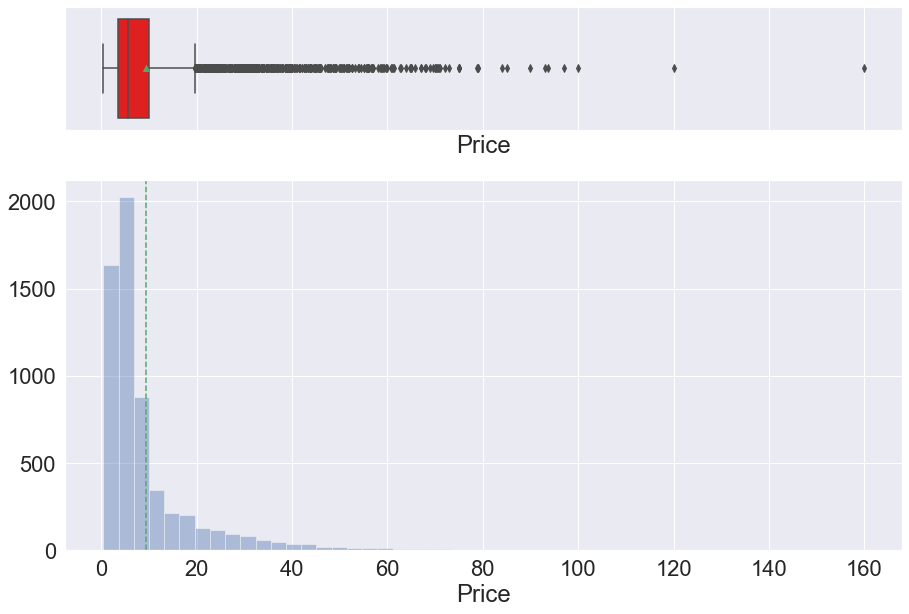

In [42]:
histogram_boxplot(df.Price) #Let's look at our target variable first

Observations: Price is highly skewed, with two very prominant outliers. In this case the outliers are likely real data, as there are expensive cars in the data, like a Lamborghini. We will treat the skewness with a log transform later.

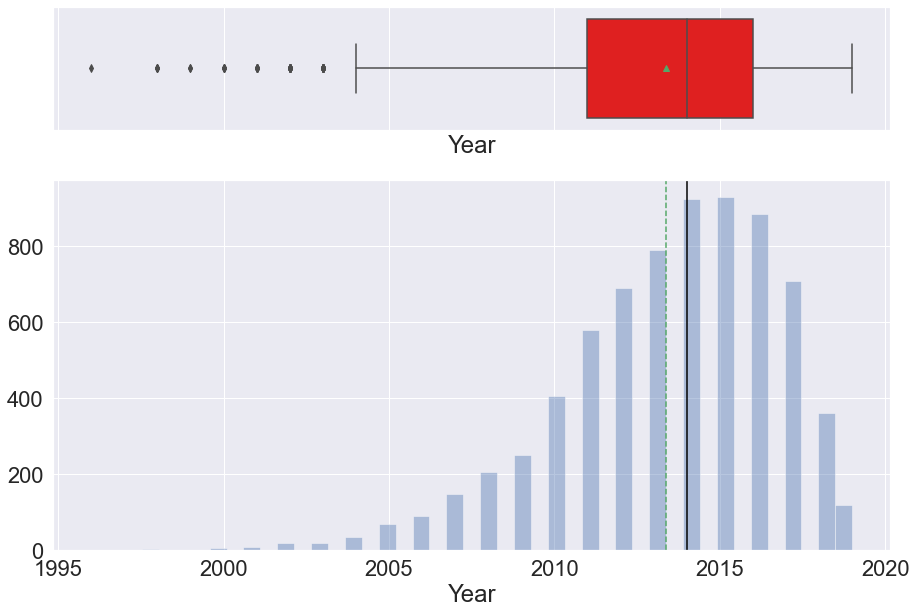

In [43]:
histogram_boxplot(df.Year)

These data are a little skewed but not too badly, there are a few older cars that form the outliers.

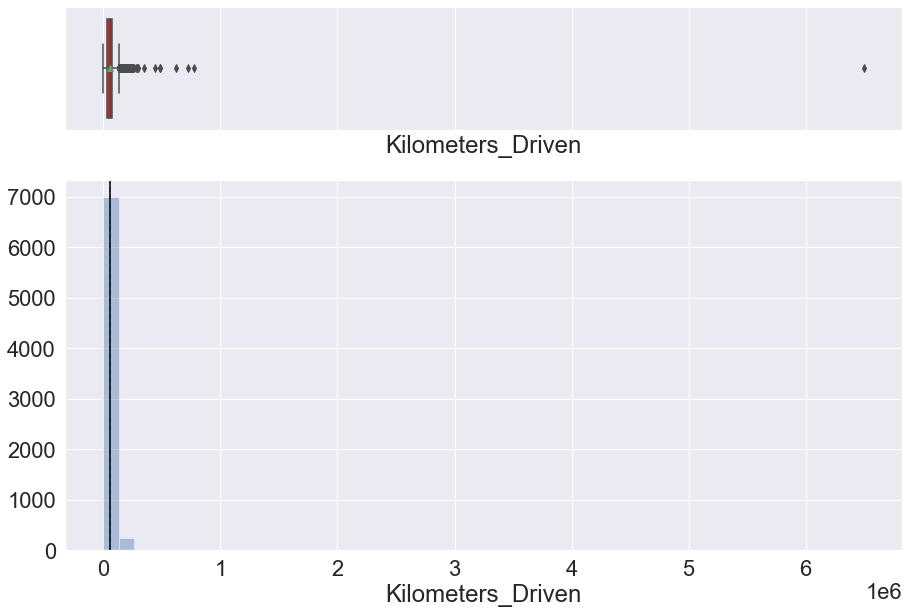

In [44]:
histogram_boxplot(df.Kilometers_Driven)

There is one outlier that is badly affecting our visualization plots. Lets fix that right now and then replot.

In [45]:
df[df['Kilometers_Driven']==6.5e+06] #Let's take a look at our offending row

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0,BMW,X5,German,1.0


Our maximum year is 2019. This car was build in 2017 and has done 6,500,000Km. Given that the Earth's circumference is only 40,075 km. This car has driven the equivalent of 162 times around the Earth in 2 years. Unlikely!! As it's only one value, let's just replace it with a median value. The amount of kilometers driven is roughly related to how old the car is, so let's look at the median value of kilometers driven for cars built in 2017 and use that value to replace our outlier.

In [46]:
df.groupby('Year')['Kilometers_Driven'].median()

Year
1996     65000.0
1998     95150.0
1999    105000.0
2000     90000.0
2001    127971.5
2002     75000.0
2003     72500.0
2004     82000.0
2005     90000.0
2006     89326.0
2007     75117.5
2008     78000.0
2009     70260.5
2010     69918.0
2011     65000.0
2012     65027.5
2013     59138.0
2014     55000.0
2015     50000.0
2016     39140.0
2017     29000.0
2018     22000.0
2019     15379.0
Name: Kilometers_Driven, dtype: float64

In [47]:
df['Kilometers_Driven'] = df['Kilometers_Driven'].replace(6500000, 29000) #29000 is median value of kilometers driven for 2017 cars

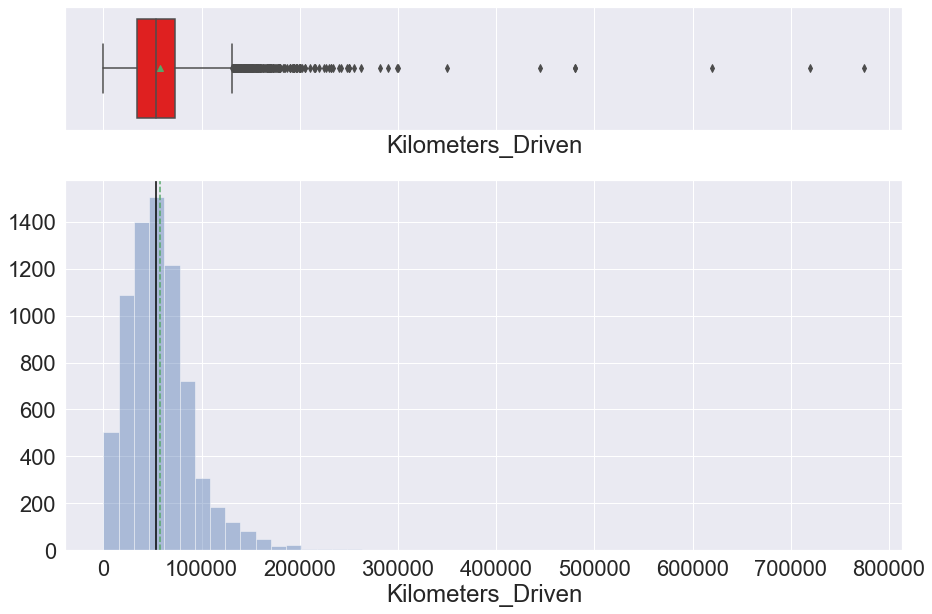

In [48]:
histogram_boxplot(df.Kilometers_Driven)

Observations: The data visualization looks much better now that the outlier has been removed. There are still quite a lot of values that lie outside of our boxplot whiskers. We will also treat this column with a log transformation to reduce the skewness. 

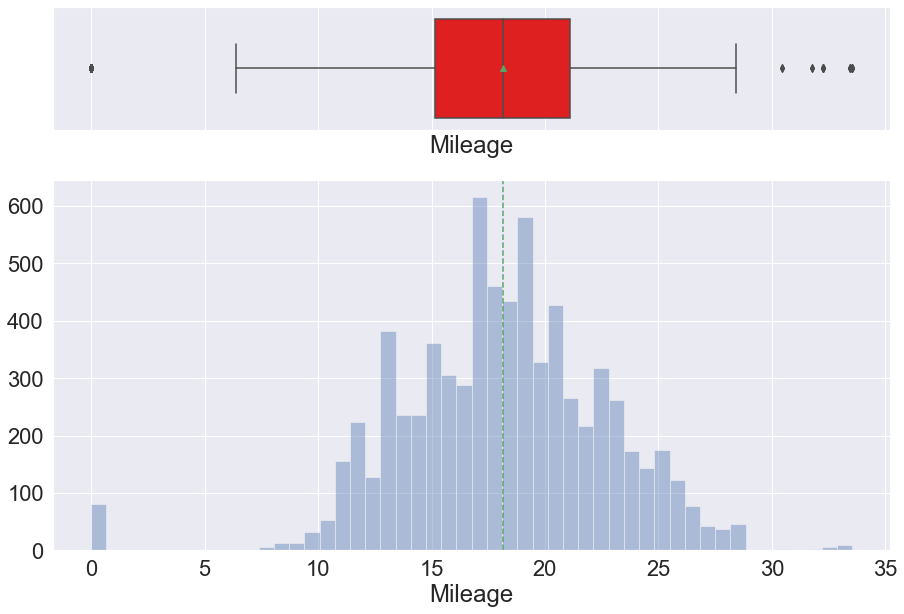

In [49]:
histogram_boxplot(df.Mileage)

Observations: There are a few zero values here, which will need to be treated. There are a few outliers on the high side, other than than, the data look to be fairly normally distributed.

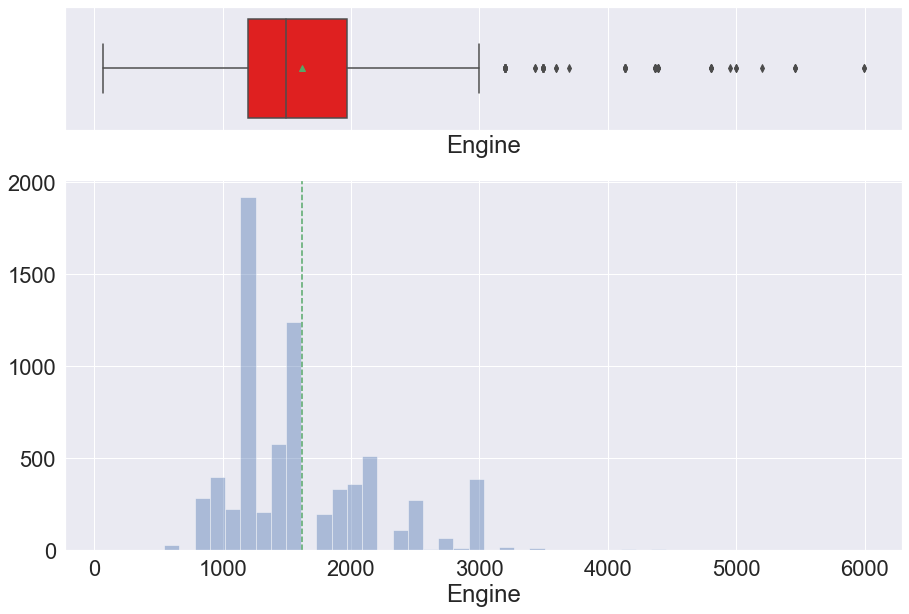

In [50]:
histogram_boxplot(df.Engine)

Observations: Data are again skewed. We will look at some different transforms for this column to try and fix this.

In [51]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,57806.9,37498.5,171,34000,53392,73000,775000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,NaN,NaN,NaN,18.1416,4.5622,0,15.17,18.16,21.1,33.54
Engine,7207,NaN,NaN,NaN,1616.57,595.285,72,1198,1493,1968,5998
Power,7078,NaN,NaN,NaN,112.765,53.4936,34.2,75,94,138.1,616


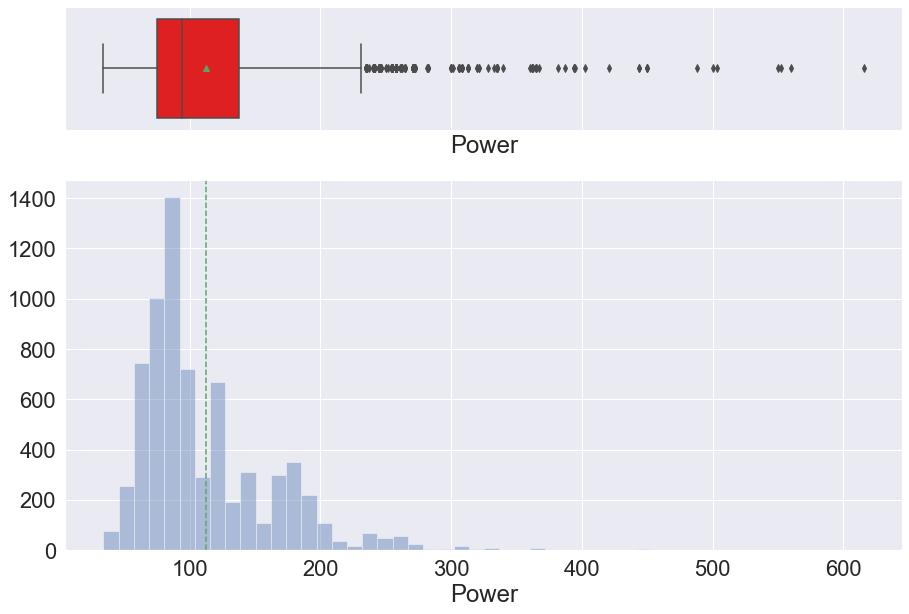

In [52]:
histogram_boxplot(df.Power)

Observations: The data are right skewed and there are a lot of outliers. Again we will address this with a log transform later.

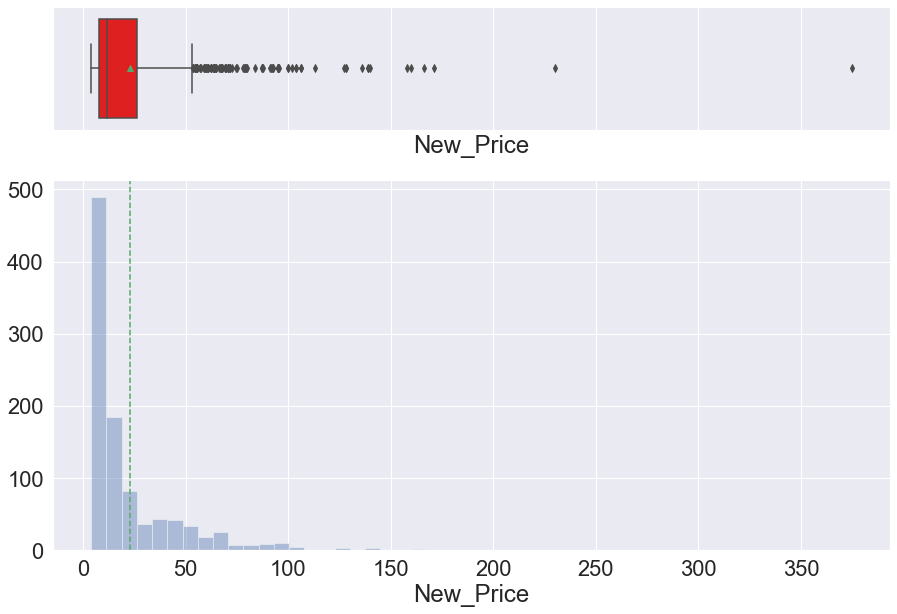

In [53]:
histogram_boxplot(df.New_Price)

Observations: These data are also right skewed, as we saw for the price column. Most cars are reasonably priced, however there are some cars with very high prices. These outliers are likely real and should not be removed/replaced. To reduce the skewness we will apply a log transform to the data.  
We also know that there are a lot of missing values for this column. Now that we have a better idea of what the data look like, we can try and treat the missing values. But first, we will continue with the visualizations.

## Count Plots

We will look at the categorical data using either seaborn count plots when there are few categories and it's easy to get a sense of what order the value counts are in. We will use the pandas bar plot when we want to also look at the order of the value counts.

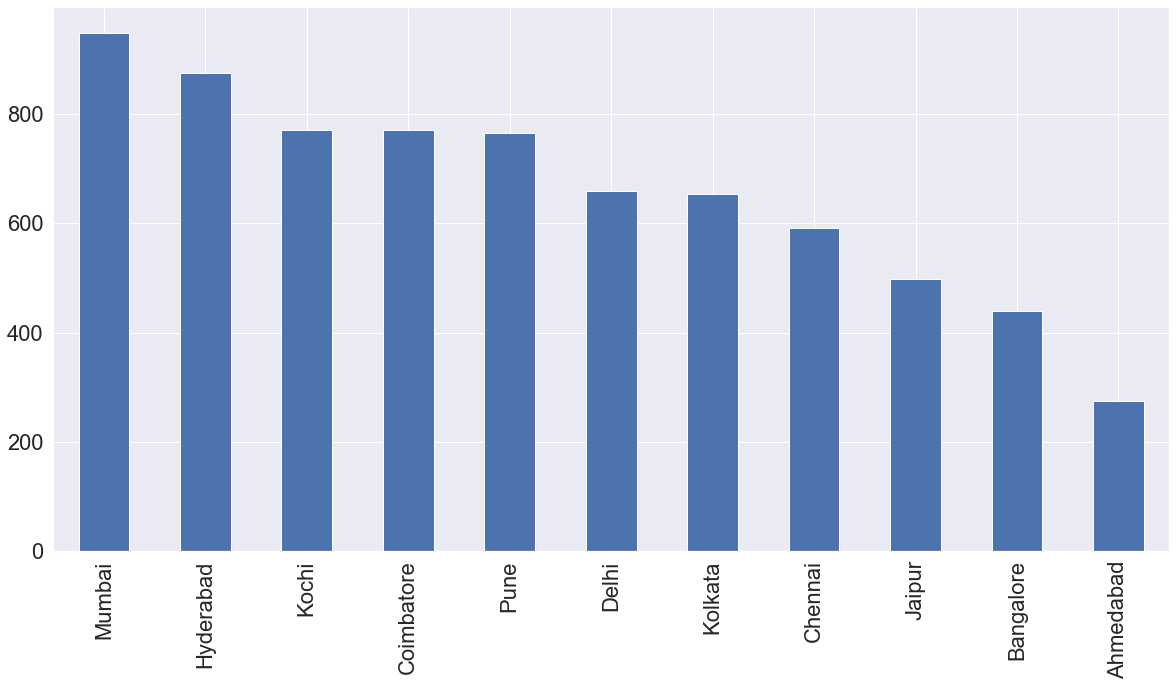

In [54]:
df['Location'].value_counts().plot(kind="bar", figsize=(20,10));

Mumbai is the most popular location and Ahmedabad the least popular. The number of cars in each location is fairly evenly spread amoungst the various locations.

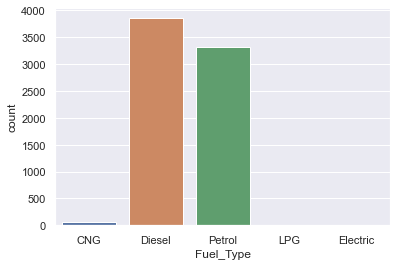

In [55]:
sns.set(font_scale=1)
sns.countplot(df['Fuel_Type']);

Diesel is the most popular fuel type, followed by Petrol. The other fuel types are very rare.

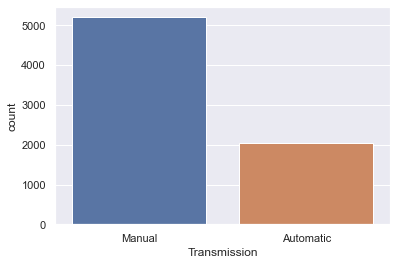

In [56]:
sns.countplot(df['Transmission']);

Manual transmission is far more popular than automatic transmission in the data set.

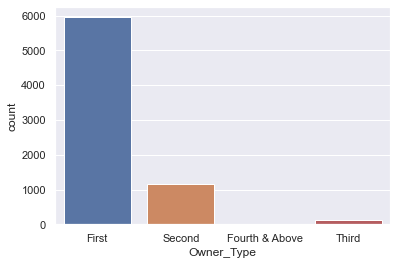

In [57]:
sns.countplot(df['Owner_Type']);

Most of the cars have only had one previous owner (at least that what I assume first means). Having more than 1 previous owner is rare and having more than 2 previous owners is vary rare.

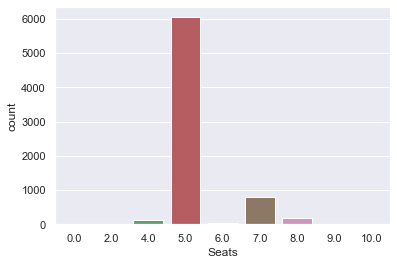

In [58]:
sns.countplot(df['Seats']);

The number of seats is a somewhat continuous variable, you can put them in order and that order has meaning. It's also somewhat of a categorical variable. I decided to show is as a count/bar plot. The histogram would look vary similar to the count plot above anyway.  
5 seater cars are by far the most popular, with more than 6 times the amount of the second most popular, 7 seat cars.

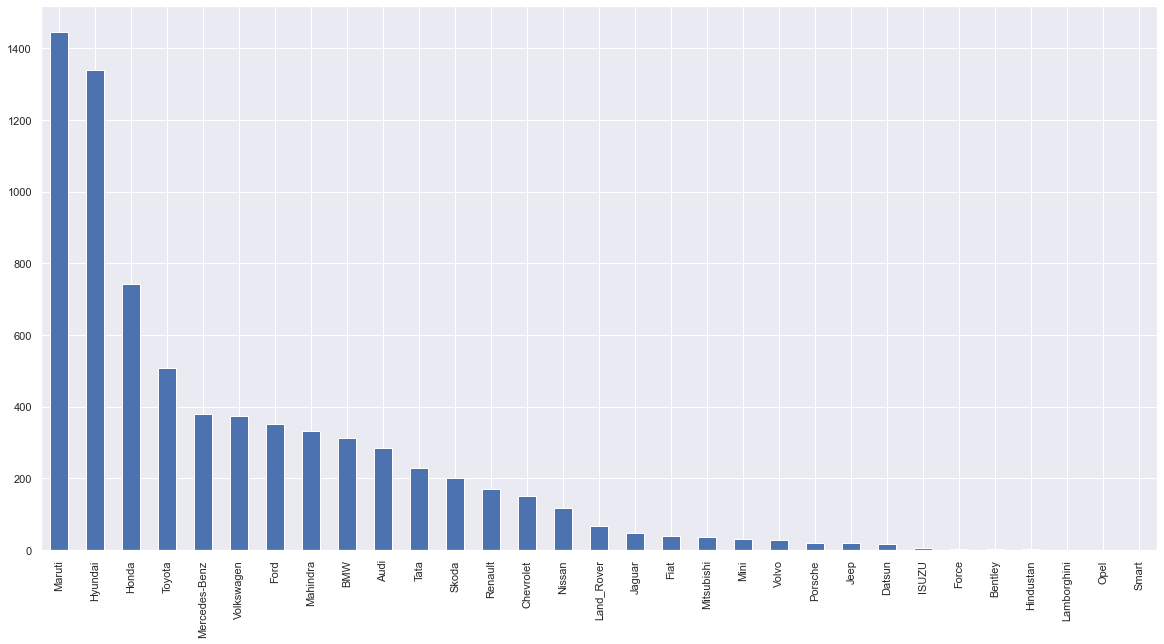

In [59]:
df['Brand'].value_counts().plot(kind="bar", figsize=(20,10));

Maruti and Hyundai are by far the most popular brands. This is followed by Honda and Toyota. After that the popularity slowly falls. On the right side of the graphs we see brands that are rare in the data set.

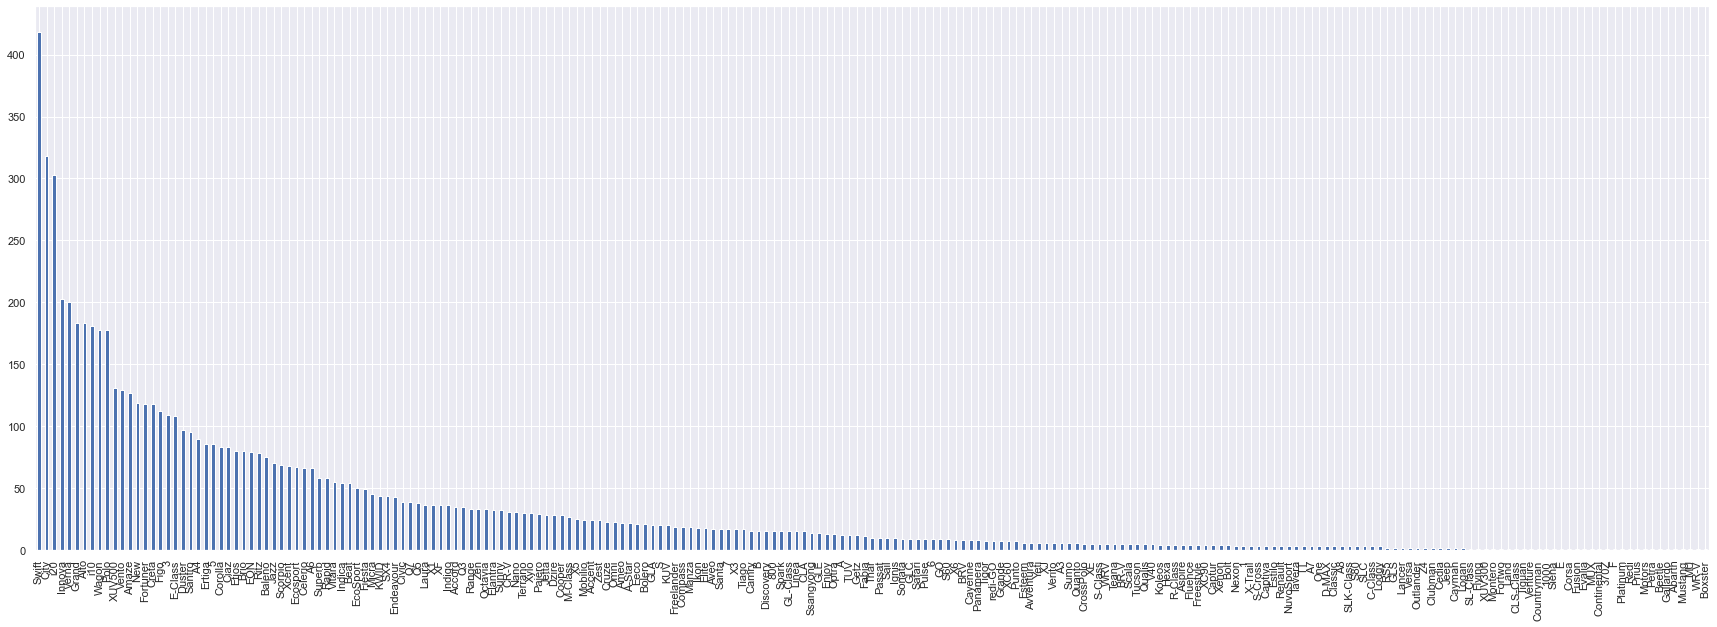

In [60]:
df['Model'].value_counts().plot(kind="bar", figsize=(30,10));

Again there is a clear most-popular model: Swift. The City and i20 models are a close 2nd and 3rd, the popularity of each model then slowly falls off as we move to the right of the graph.

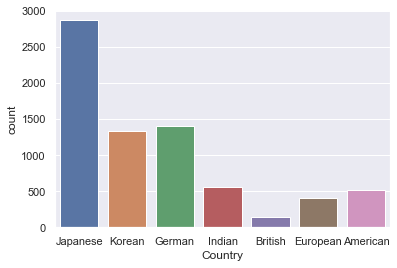

In [61]:
sns.countplot(df['Country']);

Japanese cars are the most popular with more than double the amount of the closest followers. Korean and German cars 

## Part 2 Bivariate Analyis


### Continuous variables
First let's look at all the continuous variables together to get a sense of how they interact

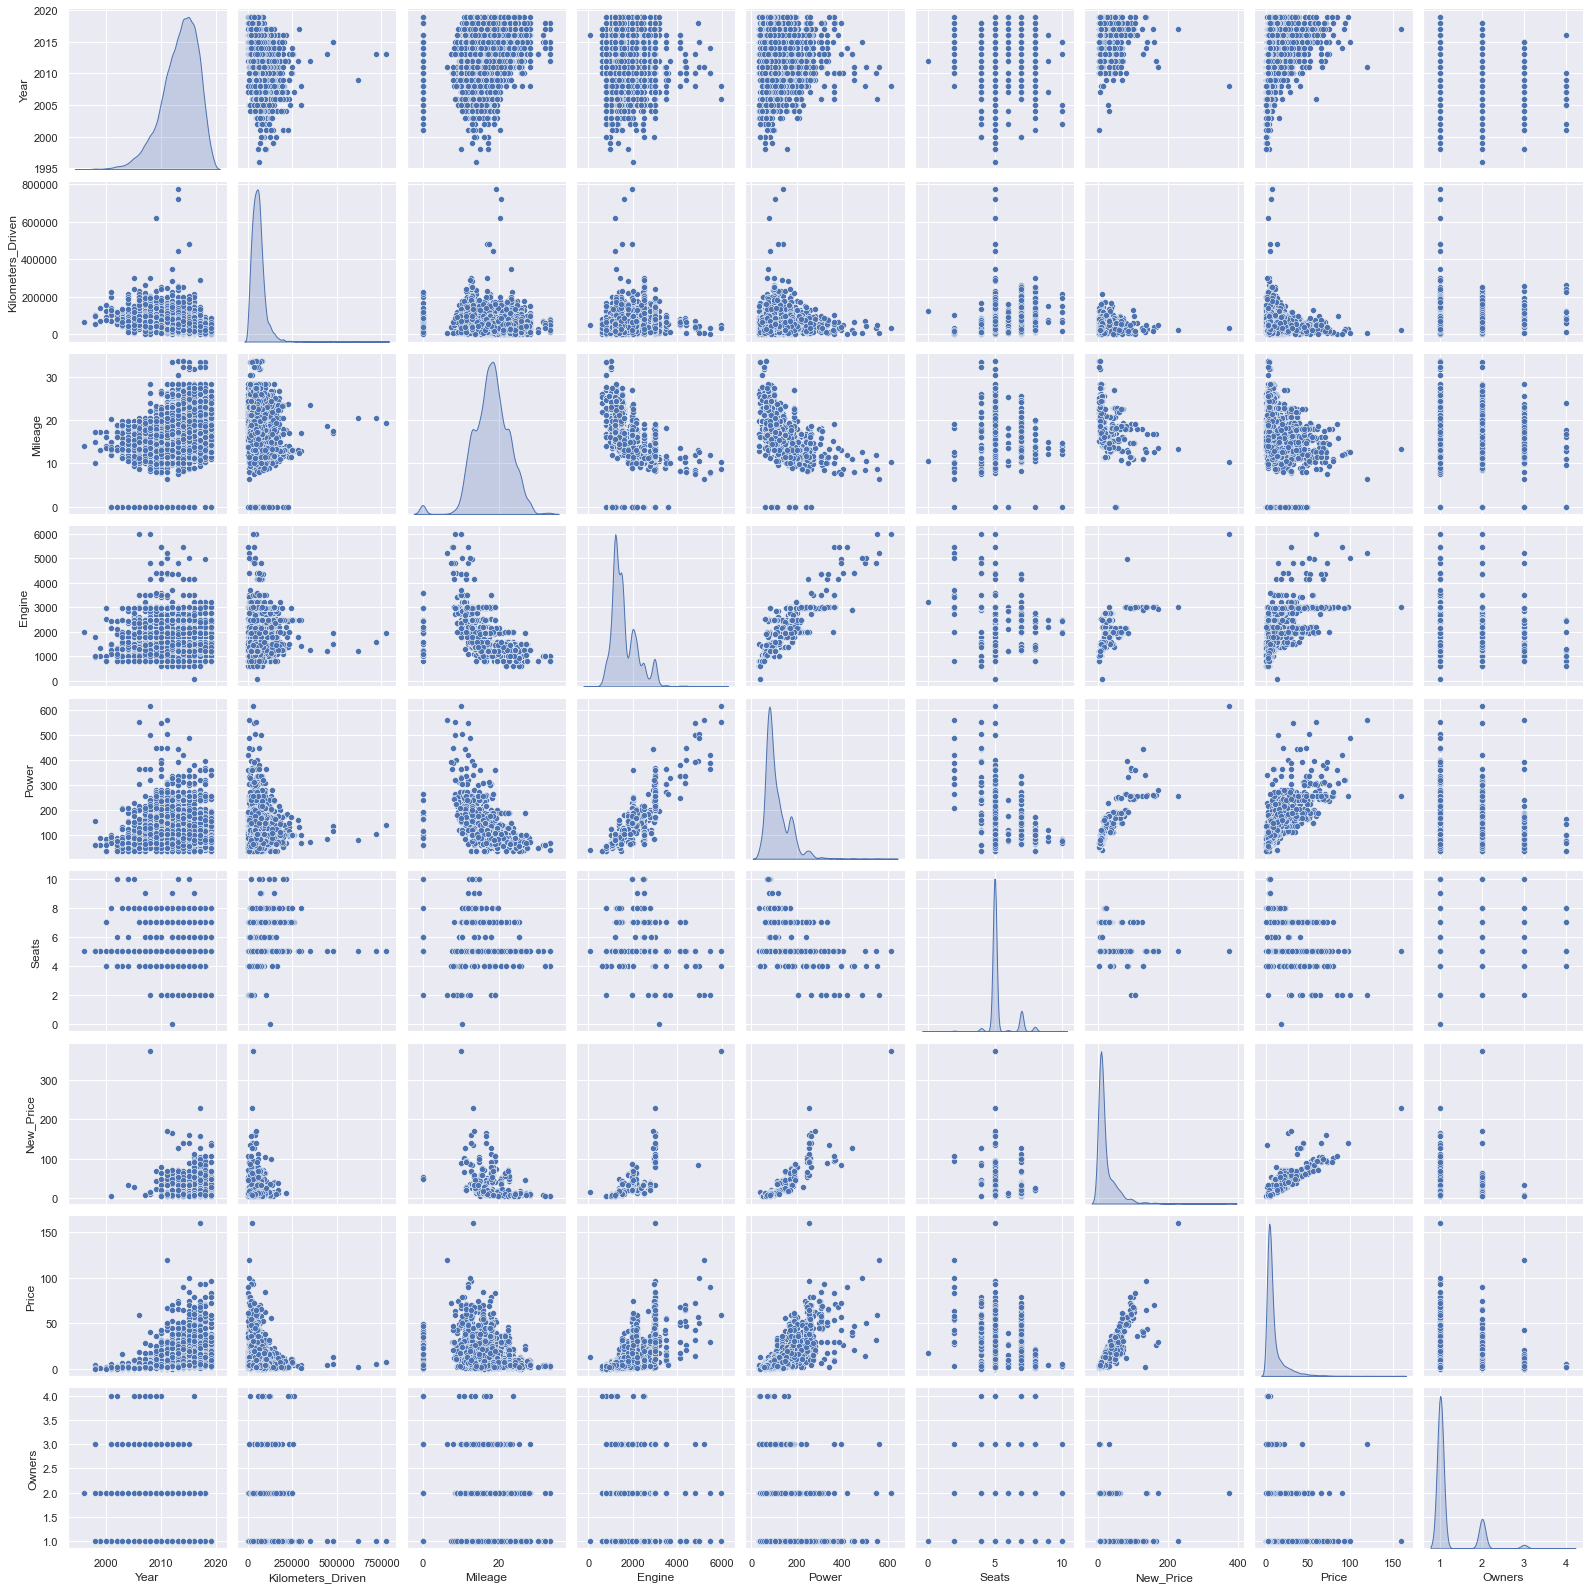

In [62]:
sns.pairplot(df, diag_kind = 'kde');

Observations:  
1) Power and Engine are positively correlated, as expected. Cars with larger engines tend to have more power.  
2) New price and price are also positively correlated, again as expected. Cars that cost more new cost more used (In general).  
3) Mileage is negatively correlated with power and engine. It appears that more powerful cars use more fuel, although the relationship is not perfectly linear. Again expected behaviour.  
Here are some generalizations:  
1) In general new cars have higher price values.  
2) Cars that have less kilometers driven have higher prices.  
3) More powerful cars have higher prices, especially New Price values, which are highly correlated with power.  
4) Cars that have had more owners are worth less.

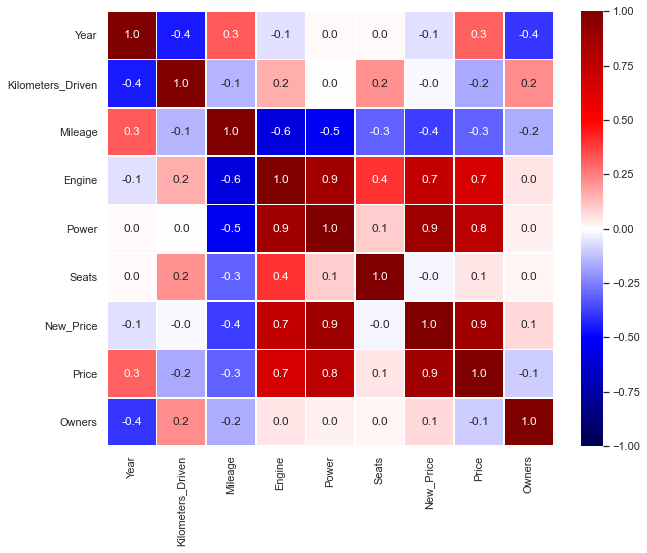

In [63]:
#Let's look at a correlation heat map of the numeric data
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr()


sns.set(font_scale=1)
fix, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7);

Observations:  
1) Price is highly correlated with New_Price, Power and Engine. More powerful cars cost more new and used.  
2) Power and engine are highly correlated, enough that we might consider dropping one of these variables.  
3) Mileage is negatively correlated with engine size.  
4) New_Price is highly correlated with Power.  
5) Surprisingly, the Kilometers Driven and number of owners are not highly correlated with price. The age of a car matters less than other factors, like new price.

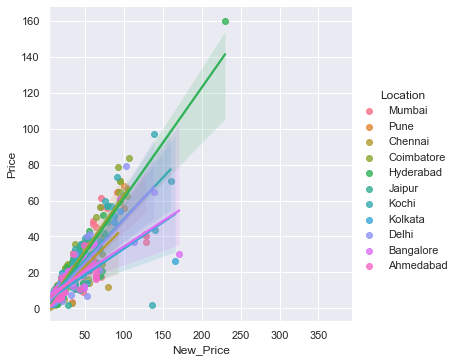

In [64]:
sns.lmplot(y='Price', x='New_Price', hue='Location', data=df);

Observations: The above plots New Price vs. Price. This was plotted to see how cars hold their value when used. If cars have a high new price but a low used price, the gradient of the fitted line will be low. Cars with a high used price, for a given new price will have a high gradient. The plot seesm to suggest that cars get a better used price in Hyperabad than Ahmedabad. However, this could be due to a few outliers so it's hard to make any firm conclusions.

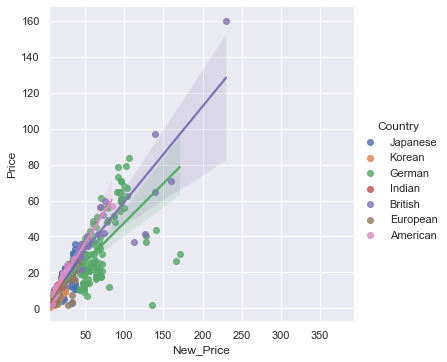

In [65]:
sns.lmplot(data=df, x='New_Price', y='Price', hue='Country');

Observations: The above plot is again New Price vs. Price. This time the plot is coloured by country. It seems that Britsh cars hold their value better than German cars. However that could again be due to outliers. The country that doesn't appear to contain many outliers and has a high gradient is America. It seems that American cars demand good used prices. So Cars4U might want to try and obtain/sell American cars where possible.  
The German cars do stand out on the above plot, you can see the cluster of green points that have high new prices and lower used prices. There are some exceptions, however Cars4U might want to be careful when dealing in German cars.

### Discrete/Categorical Variables vs. Continuous Variables

Now let's look at the relationship of some discrete/Categorical Variables with some key continuous variables

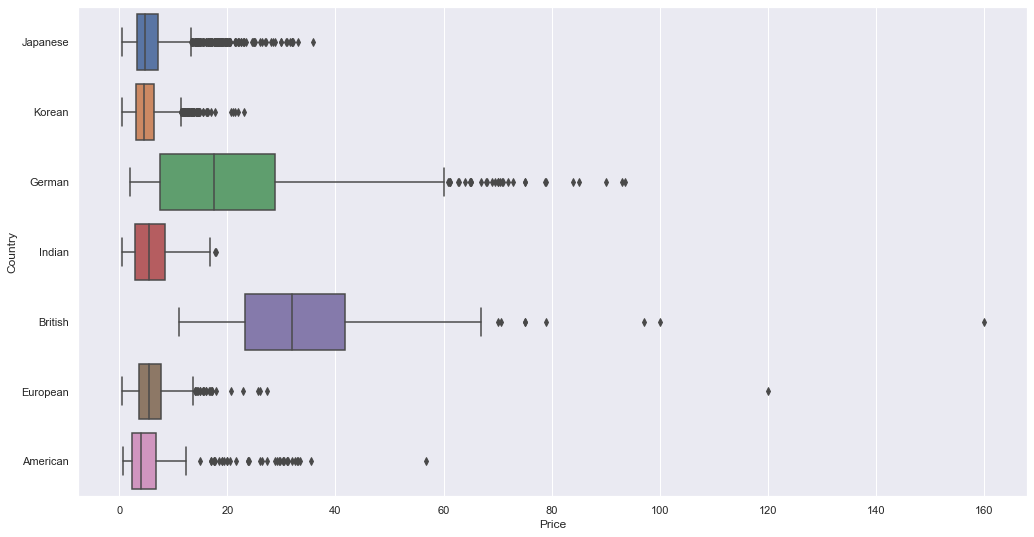

In [66]:
#Let's look at used price against country
plt.figure(figsize=(17,9))
sns.boxplot(y="Country",x="Price",data=df)
plt.show()

Observations: British cars have the highest used value, followed by German, the rest have similar Q1-Q3 ranges

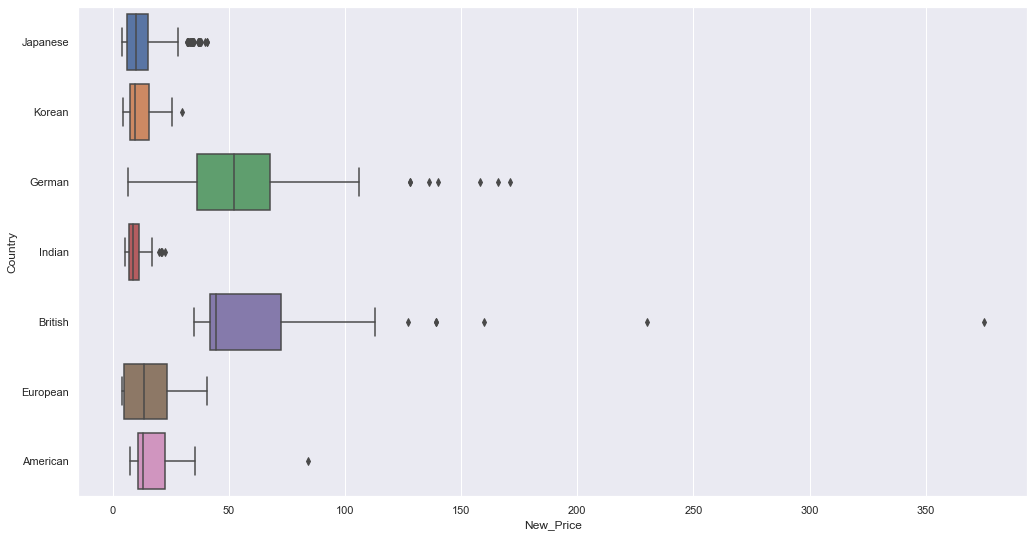

In [67]:
#Now let's look at new price vs. Country
plt.figure(figsize=(17,9))
sns.boxplot(y="Country",x="New_Price",data=df)
plt.show()

Observations: Above is the new price of cars. Note that the British and German cars have similar Q1 and Q3 values but when the cars are used (when plotting "Price"). The British cars have the higher Q1 and Q3. Conclusion: British cars hold their value more than the German Cars (In general).  

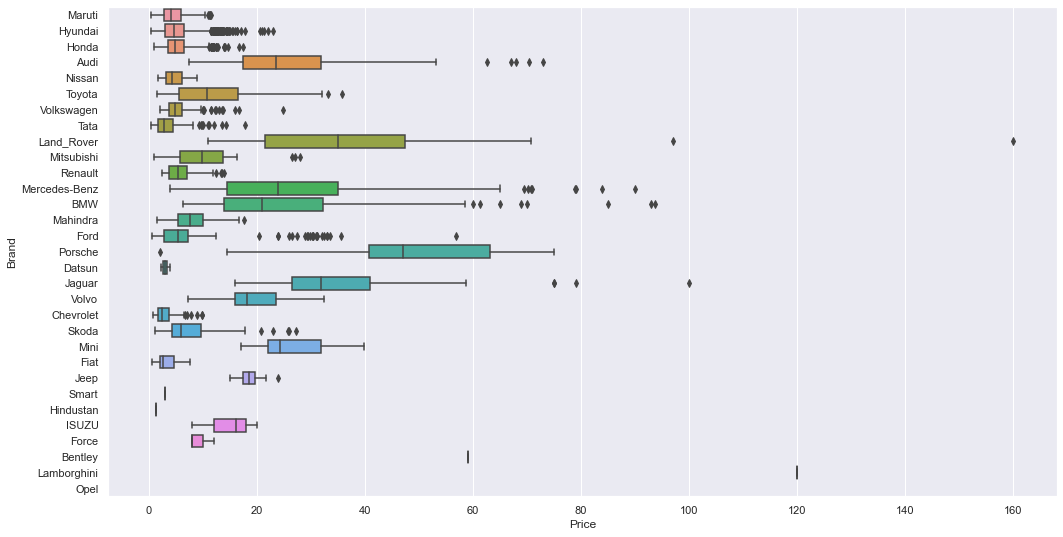

In [68]:
# Now let's look at price vs. Brand
plt.figure(figsize=(17,9))
sns.boxplot(y="Brand",x="Price",data=df)
plt.show()

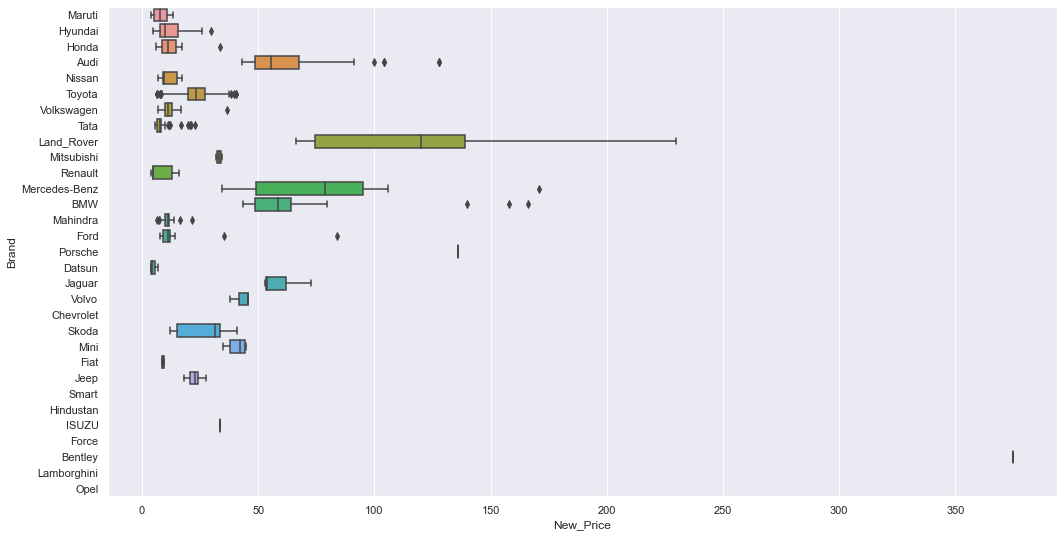

In [69]:
# Let's plot new price vs. Brand
plt.figure(figsize=(17,9))
sns.boxplot(y="Brand",x="New_Price",data=df)
plt.show()

Observations: With so many brand types, it's hard to make many conclusions looking at the above two plots. This indicates that further binning the brands by country was a good idea.  
In addition to the large number of brands, there are also a large number of data points missing in the New_Price column, so we are not seeing the full picture when looking at this plot.  
We can see that there are a few stand out brands with high prices, like Lamborghini, Land Rover, Porsche, etc. The other brands all tend to have similar distributions at lower prices.

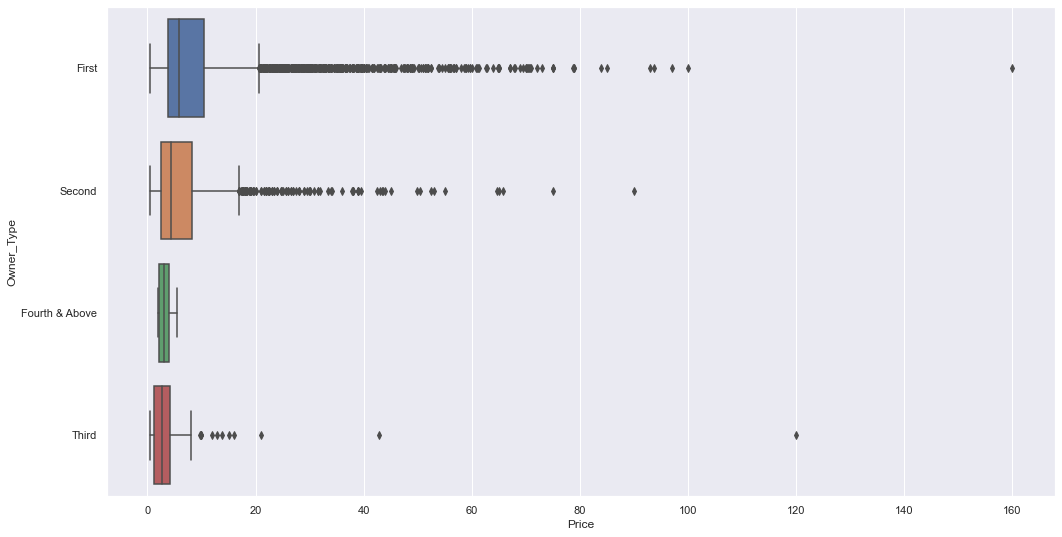

In [70]:
plt.figure(figsize=(17,9))
sns.boxplot(y="Owner_Type",x="Price",data=df)
plt.show()

Observations: The price drops between first and second owners. The price also drops between second and third. However the price does not drop between the third and fourth and above. It seems that once a car has had a certain number of owners, the price stops dropping.

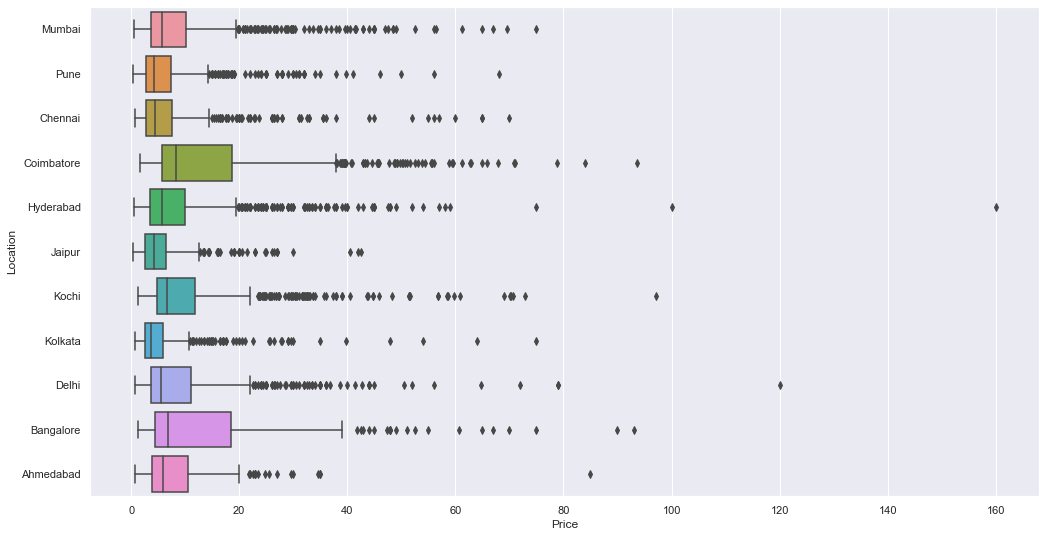

In [71]:
# let's plot price vs. location
plt.figure(figsize=(17,9))
sns.boxplot(y="Location",x="Price",data=df)
plt.show()

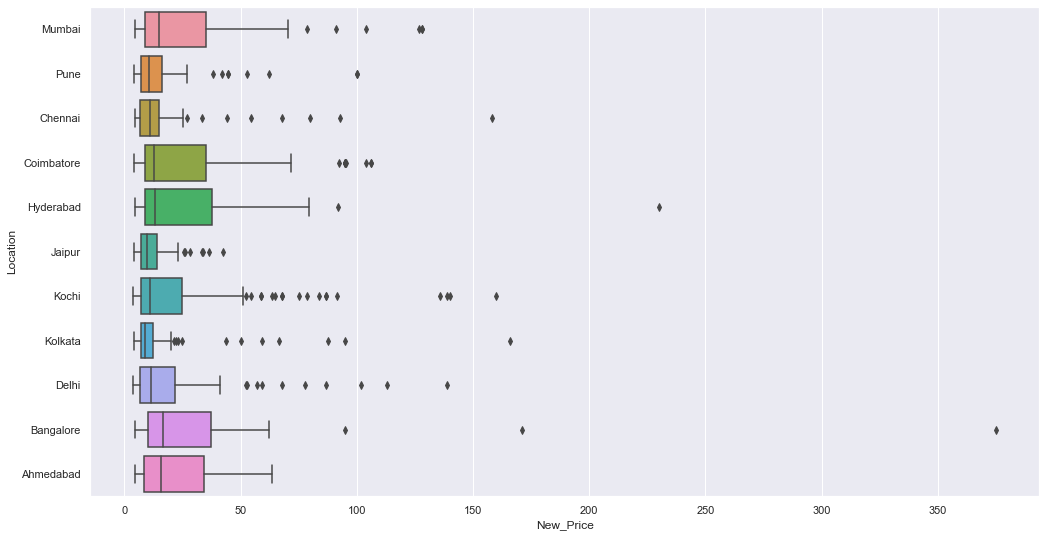

In [72]:
# let's plot new price vs. location
plt.figure(figsize=(17,9))
sns.boxplot(y="Location",x="New_Price",data=df)
plt.show()

Observations: In many of these plots, I'm choosing to plot both Price and New_Price, this is because these two variables are highly correlated, so it makes sense to look at both. For example, if we just looked at the Price plot, we could say that Coimbatore and Bangalor is the best market for used cars, because that is where we see the highest prices. However, it could just be that more expensive new cars are sold in these markets and the used car market follows the new car market prices.  

Again, with so much data missing in the New Price column it's hard to make conclusive statements. However, we can that Ahmedebad has a much lower Q3 value in the used market, compared to the new car market. It seems that used cars are worth less there, so it could be a bad market to focus on.
It seems like Coimbatore is a good location to focus on as the Q1 value for price is quite high there compared to the other locations, while the new car price in Coimbarore is about the same as the other locations.

# Data Pre-Processing

Now that we have a good idea of what our data look like. Let's condition the data before attempting a Linear Regression.  
We have already done some things, like feature engineering the Brand, Model and Country columns. We have also created an ordinal variable from the Owner_Type. We also removed the outlier in the Kilometers Driven column.  

Here is the list of things still to do:  
1) Treat the zero values in the Mileage and seats column.  
2) Fill missing values in the Mileage, Engine, Seats, Power, Price and New_Price columns.  
3) Treat skewness in the Price, New_Price, Kilometers_Driven, Engine and Power columns.  
4) Look at the scale of resulting columns and either apply a standard scalar or min-max scalar (if required)

## Treat zero values
### Zero Values in Seats
I'm going to look at the zero values in seats first, then move onto mileage

In [73]:
df[df['Seats']==0] #Let's find out where seats = zero. It's only one line, good news!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,NaN,18.0,Audi,A4,German,1.0


In [74]:
#The one line with zero seats is for the Audi A4. We have more of those in the data so, let's check the number of seats
df[df['Model']=='A4'].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,German,2.0
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,21.43,Audi,A4,German,1.0
65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55,1968.0,140.00,5.0,NaN,13.50,Audi,A4,German,1.0
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,NaN,9.80,Audi,A4,German,1.0
150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,23.32,Audi,A4,German,1.0


In [75]:
#The Audi A4 has 5 seats, so let's replace our one missing zero value with a 5
df['Seats'] = df['Seats'].replace(0,5.0) #This replaces the zero value
df[df['Seats']==0] #This checks to see if the zero is gone. It is.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners


### Zero Values in Mileage 
Now let's move on to filling the zeros in the Mileage column. In the Project Rubric it says to do this by the Brand column. The exact wording is: "Missing value treatment by column median grouped by the 'brand' name".   

However, mileage is more specific to the model. For example a Toyota Tundra and Toyota Prius have very different mileage values. It makes much more sense to fill missing mileage values using the model (If it's available). Our plan B, if there are no mileage values for the specific model, will be to get the median mileage value from the Brand. So that's what we will do.  

#### First remove the nulls
First, there are 2 null values in the mileage column. Let's fill those first as it will make the next step easier:

In [76]:
df[df['Mileage'].isnull()] #Let's find the null values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,Mahindra,E,Indian,1.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,Toyota,Prius,Japanese,1.0


In [77]:
#let's find the Mileage for the Mahindra E model
df[df['Model']=='E']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.0,Mahindra,E,Indian,1.0


In [78]:
#let's find the Mileage for the Toyota Prius model
df[df['Model']=='Prius']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,Toyota,Prius,Japanese,1.0


It looks like there is only one Mahindra E and one Toyota Prius. So we can't get the missing mileage values from the model. In that case let's get the values from the Brand

In [79]:
df.groupby('Brand')['Mileage'].median()

Brand
Audi             15.730
BMW              17.050
Bentley           9.400
Chevrolet        18.100
Datsun           20.630
Fiat             18.400
Force            17.000
Ford             18.880
Hindustan        13.450
Honda            17.800
Hyundai          18.900
ISUZU            12.400
Jaguar           14.740
Jeep             17.100
Lamborghini       6.400
Land_Rover       12.630
Mahindra         15.100
Maruti           21.100
Mercedes-Benz    14.210
Mini             18.860
Mitsubishi       13.500
Nissan           19.340
Opel             14.200
Porsche          15.150
Renault          19.870
Skoda            17.200
Smart             0.000
Tata             20.475
Toyota           12.990
Volkswagen       17.210
Volvo            13.500
Name: Mileage, dtype: float64

The median mileage for Mahindra is 15.1. The median mileage for Toyota is 12.99 kmpl. We will use those values

In [80]:
df.iloc[4446,7] #This is the exact location of the missing value for the Mahindra E in the data frame

nan

In [81]:
df.iloc[4446,7] = 15.1 #We will just change this one value manually

In [82]:
df.iloc[4446,7] #Here is the check

15.1

In [83]:
df.iloc[4904,7] = 12.99 #Now we will change the value for the Prius manually

In [84]:
df['Mileage'].isnull().sum() #We can see that there are now no more nulls in the mileage column

0

### Zero values in Mileage - Replace zeros
Now we can move on to replacing the zero values in the mileage column. We will go back to using the strategy of using the model, rather than the brand, to replace the missing values.

In [85]:
model_mileage = pd.DataFrame(df.groupby('Model')['Mileage'].median()) #Make a data frame with the model name and mileage
model_mileage.head(10)

,Mileage
Model,
1,20.58
1000,15.00
3,18.88
370Z,10.00
5,18.12
6,9.52
7,16.46
800,16.10
A,20.00


In [86]:
model_mileage['Mileage'].isnull().sum() #check to see that for every model, we have a median mileage value - we do!

0

In [87]:
# The for loop will go through every line of the data frame and look in column 7 (Mileage)
# If the mileage is zero then it will look in column 14 (Model) and get the name
# The name is the index of our model_mileage data frame so the loop looks for the name in the index
# Then takes the value from column zero, which is the median mileage for each model

for i in range(0,7253):
    if df.iloc[i,7] == 0.0:
        df.iloc[i,7] = model_mileage.loc[df.iloc[i,14]][0]


In [88]:
df[df['Mileage']==0] #This is to check where our mileage still equals zero - there are still a few locations

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67,Mercedes-Benz,C-Class,German,1.0
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,NaN,3.00,Smart,Fortwo,German,2.0
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,52.26,39.50,Mercedes-Benz,C-Class,German,1.0
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,NaN,6.99,Mahindra,Jeep,Indian,1.0
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,0.0,1242.0,NaN,5.0,NaN,0.55,Fiat,Siena,European,3.0
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.00,Mercedes-Benz,C-Class,German,1.0
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70,Mahindra,Jeep,Indian,1.0


In [89]:
#The reason we still have some instances of zero mileage is because there are some models that have zero as the median value.
model_mileage['Mileage'].sort_values() 

Model
Jeep         0.00
C-Class      0.00
Fortwo       0.00
Siena        0.00
Gallardo     6.40
            ...  
Nano        25.40
Amaze       25.80
Aspire      26.10
Ciaz        26.21
Dzire       28.40
Name: Mileage, Length: 221, dtype: float64

We filled most of the zeros in the mileage column using the model median. However, some of the models have zero as the median value.  
Given that we still have some zeros, we will need to fill them with the Brand median mileage, rather than the Model median mileage. We will use the same method. Only now we will need to create a Brand median mileage data frame.

In [90]:
brand_mileage = pd.DataFrame(df.groupby('Brand')['Mileage'].median()) #Make a data frame with the model name and median mileage
brand_mileage.head(50) #There is still one more zero for smart!

,Mileage
Brand,
Audi,15.730
BMW,17.050
Bentley,9.400
Chevrolet,18.100
Datsun,20.630
Fiat,18.400
Force,17.000
Ford,18.880
Hindustan,13.450


In [91]:
# This is the same loop as before, 
# only this time it will look for the Brand name in df and take the median value from brand_mileage
for i in range(0,7253):
    if df.iloc[i,7] == 0.0:
        df.iloc[i,7] = brand_mileage.loc[df.iloc[i,13]][0]


In [92]:
df[df['Mileage']==0] #This is to check where our mileage still equals zero - there is still one more location

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,NaN,3.0,Smart,Fortwo,German,2.0


There is still one more zero to treat, this is getting exhausting!!
There is only one Smart brand car in the data set and it's mileage value is zero. In this case, we are just going to have to fill in this value using "domain knowledge", i.e., a Google search.  
Google puts this car at 86.5 mpg = 36.77 kmpl. That would make this car higher than our current maximum value in the Mileage column (currently 33.54 kmpl). Given that the Smart car is a tiny car designed to be very fuel efficient, I don't think the value of 36.77 kmpl is unreasonable. For this reason, I'm going to use this value in this column.

In [93]:
df.iloc[915,7] = 36.77 #replace the value in the mileage column
df[df['Brand']=='Smart'] #now to check it, looks good!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,36.77,799.0,NaN,2.0,NaN,3.0,Smart,Fortwo,German,2.0


In [94]:
df.describe().T #The minimum and maximum for mileage have changed due to the work we did.

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,57806.880601,37498.477745,171.00,34000.000,53392.00,73000.0000,775000.00
Mileage,7253.0,18.312647,4.166258,6.40,15.290,18.16,21.1000,36.77
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_Price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
Owners,7253.0,1.201572,0.456808,1.00,1.000,1.00,1.0000,4.00


In [95]:
del model_mileage
del brand_mileage # technically not necessary but just to keep things tidy we will delete our temp data frames.

## Fill Missing Values

Fill missing values in the Engine, Seats, Power, Price and New_Price columns.

We already filled the missing values in the Mileage column, let's move onto the other columns now

In [96]:
df.isnull().sum().sort_values(ascending=False) #Let's see how many nulls remain in the data

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Transmission            0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Owners                  0
Owner_Type              0
Mileage                 0
Country                 0
Brand                   0
Model                   0
Name                    0
dtype: int64

### Fill Nulls in Engine
Given that Engine is the value with the least amount of nulls. Let's start there.

Again, the marking rubric says to use the brand to fill missing values. However, I think that the engine size is more related to the model than the brand. A Toyota Tundra and a Toyota Prius are two very differnt cars with two very different engine sizes. My hope is that whoever is marking this is looking at the method, and my justification for using it, rather than dogmatically insisting that the Brand column be used.

In [97]:
#First let's check that that for every model type, we have a median engine value
df.groupby('Model')['Engine'].median().isnull().sum() #There are no null values, so every model has a median engine value

0

In [98]:
model_engine = pd.DataFrame(df.groupby('Model')['Engine'].median()) #Make a data frame with the model name and median engine value
model_engine.head() 

,Engine
Model,
1,1995.0
1000,970.0
3,1995.0
370Z,3696.0
5,1995.0


In [99]:
#The loop below goes row by row and checks if the value of the engine column is null.
#If the value is null then the loop takes the model name (column 14) and uses that name in the index
#of the model_engine data frame. It then reads and returns the median engine value for that model.

for i in range(0,7253):
    if pd.isna(df.iloc[i,8]):
        df.iloc[i,8] = model_engine.loc[df.iloc[i,14]][0]

In [100]:
df[df['Engine'].isnull()] #check to see if all the nulls are gone - They are

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners


### Fill Nulls in Seats

Seats has the next largest number of nulls so let's look at that. Again, I feel like number of seats is more specific to the model than the brand so I'm going to attempt to fill in missing values based on the model median rather than brand median.

In [101]:
model_seats = pd.DataFrame(df.groupby('Model')['Seats'].median()) #Make a data base with model name as index and median seats as values
model_seats.sort_values(by='Seats') #Let's check to see if there are zeros or nulls.

,Seats
Model,
F,2.0
SL-Class,2.0
SLC,2.0
370Z,2.0
SLK-Class,2.0
...,...
Versa,8.0
Enjoy,8.0
Tavera,10.0


In [102]:
# The 'Estilo model has null values for seats so let's look at that model.
df[df['Model']=='Estilo']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,Maruti,Estilo,Japanese,2.0
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,Maruti,Estilo,Japanese,2.0
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,Maruti,Estilo,Japanese,2.0


There are only 3 instances of the Maruti Estilo in the data. A google search tells me that this car has 5 seats. Given that is the most popular number of seats by a long way, the value seems reasonable. I'm going to fill these null values manually with the value 5

In [103]:
df.iloc[2369,10] = 5 #Fill the 3 rows with the correct number of seats
df.iloc[3882,10] = 5
df.iloc[5893,10] = 5
df[df['Model']=='Estilo'] #check our work - it's good!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,5.0,NaN,1.50,Maruti,Estilo,Japanese,2.0
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,5.0,NaN,2.50,Maruti,Estilo,Japanese,2.0
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,5.0,NaN,1.75,Maruti,Estilo,Japanese,2.0


In [104]:
model_seats = pd.DataFrame(df.groupby('Model')['Seats'].median()) #Re-make the data frame now we've fixed the Estilo
model_seats.sort_values(by='Seats') #There were no zeros anyway and now there are no nulls.

,Seats
Model,
SL-Class,2.0
370Z,2.0
SLC,2.0
Boxster,2.0
Z4,2.0
...,...
Enjoy,8.0
Scorpio,8.0
Venture,8.0


We have a complete data base of median seat numbers per car model. We can now use this to fill the missing values in our seats column.

In [105]:
#The loop below goes row by row and checks if the value of the seats column is null.
#If the value is null then the loop takes the model name (column 14) and uses that name in the index
#of the model_seats data frame. It then reads and returns the median seats value for that model.

for i in range(0,7253):
    if pd.isna(df.iloc[i,10]):
        df.iloc[i,10] = model_seats.loc[df.iloc[i,14]][0]
        
df[df['Seats'].isnull()] #Check our work - it's an empty data frame, so all nulls are filled

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners


### Fill Nulls in Power

Given that Engine and Power are so highly correlated AND Engine had less nulls than power, it's likely that the power column will be dropped when performing the linear regression.  
However, we will fill the values just to be thorough. I'm again going to use the missing power values from the median of that model. Given that there are more null's in the power column, this method won't work for every row. Where we still have nulls we will use the median for the brand. The method should be familiar to whoever has read this far.

In [106]:
model_power = pd.DataFrame(df.groupby('Model')['Power'].median()) #For each car model, get the median power
model_power.isnull().sum() #we already know there are no zeros from our visualizations. Let's see how many nulls there are: 8

Power    8
dtype: int64

In [107]:
#The loop below goes row by row and checks if the value of the power column is null.
#If the value is null then the loop takes the model name (column 14) and uses that name in the index
#of the model_power data frame. It then reads and returns the median power value for that model.

for i in range(0,7253):
    if pd.isna(df.iloc[i,9]):
        df.iloc[i,9] = model_power.loc[df.iloc[i,14]][0]
        
df[df['Power'].isnull()] #Check our work - there are still 8 model types that have no Power values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,36.77,799.0,NaN,2.0,NaN,3.00,Smart,Fortwo,German,2.0
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.00,3436.0,NaN,2.0,NaN,40.00,Porsche,Cayman,German,1.0
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.50,1242.0,NaN,5.0,NaN,0.85,Fiat,Petra,European,2.0
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,15.10,2498.0,NaN,6.0,NaN,6.99,Mahindra,Jeep,Indian,1.0
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.00,3436.0,NaN,2.0,NaN,43.00,Porsche,Cayman,German,1.0
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50,1061.0,NaN,5.0,NaN,1.50,Maruti,Estilo,Japanese,2.0
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.50,1061.0,NaN,5.0,NaN,2.50,Maruti,Estilo,Japanese,2.0
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,18.40,1242.0,NaN,5.0,NaN,0.55,Fiat,Siena,European,3.0
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.00,970.0,NaN,5.0,NaN,0.85,Maruti,1000,Japanese,2.0
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,5.0,NaN,1.75,Maruti,Estilo,Japanese,2.0


In [108]:
brand_power = pd.DataFrame(df.groupby('Brand')['Power'].median()) #For each car BRAND, get the median power
brand_power.isnull().sum() #There is one brand that still has no median power value. We will deal with that in a moment

Power    1
dtype: int64

In [109]:
#The loop below goes row by row and checks if the value of the power column is null.
#If the value is null then the loop takes the BRAND name (column 13) and uses that name in the index
#of the brand_power data frame. It then reads and returns the median power value for that BRAND.

for i in range(0,7253):
    if pd.isna(df.iloc[i,9]):
        df.iloc[i,9] = brand_power.loc[df.iloc[i,13]][0]
        
df[df['Power'].isnull()] #Check our work, we expect to find one null value remaining... and we do.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,36.77,799.0,NaN,2.0,NaN,3.0,Smart,Fortwo,German,2.0


At this point we could get the median power from the counrty. However if we have a look at the plot below, we can see that German cars have quite a high median power. We do not expect the Smart Fortwo to be a high power car.

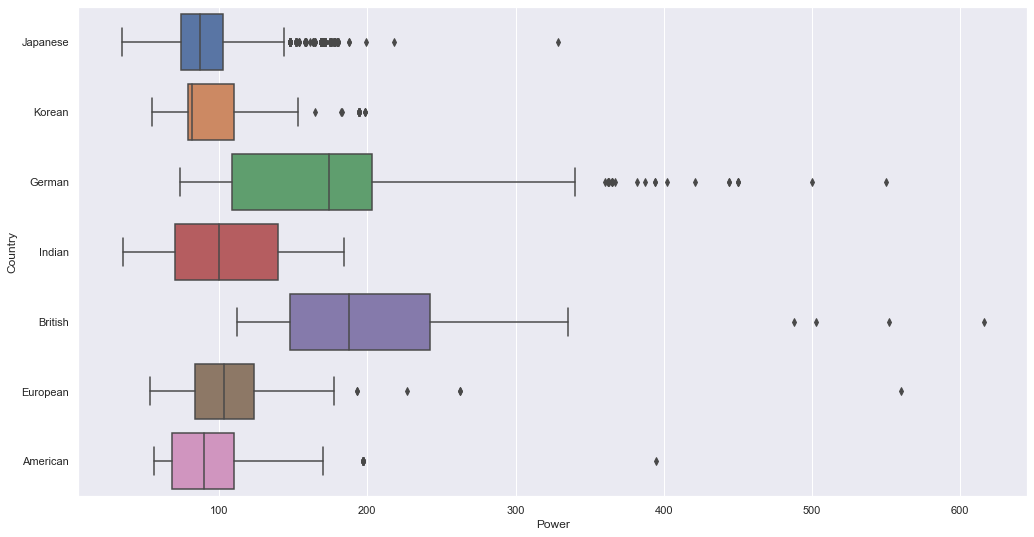

In [110]:
# let's plot new price vs. location
plt.figure(figsize=(17,9))
sns.boxplot(y="Country",x="Power",data=df)
plt.show()

Given that we can't take the median power from the model or brand columns and it seems unreasonable to take if from the country. It's back to relying on "Domain Experience" i.e. Google.  
My search returned: The 2008 Smart Fortwo has a power of 70 hp = 69 bhp. That's the value that I'm going to use.

In [111]:
df.iloc[915,9] = 69.0 #Fill the missing value
df[df['Model']=='Fortwo'] #Check the work, looks good!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,36.77,799.0,69.0,2.0,NaN,3.0,Smart,Fortwo,German,2.0


### Fill Nulls in New_Price

There are a lot of null values in New_Price. I will be filling the nulls with the same method that I've been using throughout. If a new price value is null, I will first attempt to fill it with the median new price of the same model. If it's still null, I will try and get the median new price for that brand.  

If you look at the lines below, you will see that; attempting to fill missing new price values with the median from that model will leave missing values as 109 models don't have a median new price.   
Filling missing values using the median new price of that brand will still leave missing values, as 6 brands have no median price.  
At that point I will take a look at what's left. It's likely that I will fill the remaining values using the median new value from that country.

In [112]:
df.groupby('Model')['New_Price'].median().isnull().sum()

109

In [113]:
df.groupby('Brand')['New_Price'].median().isnull().sum()

6

In [114]:
df.groupby('Country')['New_Price'].median().isnull().sum()

0

In [115]:
model_new_price = pd.DataFrame(df.groupby('Model')['New_Price'].median()) #make a data frame with index model names and values median new price of that model
brand_new_price = pd.DataFrame(df.groupby('Brand')['New_Price'].median()) #make a data frame with index brand names and values median new price of that brand

In [116]:
# Loop through all values and replace missing New Price values using median for the current model
for i in range(0,7253):
    if pd.isna(df.iloc[i,11]):
        df.iloc[i,11] = model_new_price.loc[df.iloc[i,14]][0]
        
# Loop through all values and replace remaining missing New Price values using median for the current brand
for i in range(0,7253):
    if pd.isna(df.iloc[i,11]):
        df.iloc[i,11] = brand_new_price.loc[df.iloc[i,13]][0]
        
temp =df[df['New_Price'].isnull()]
temp['Brand'].value_counts()

Chevrolet      151
Force            3
Hindustan        2
Lamborghini      1
Smart            1
Opel             1
Name: Brand, dtype: int64

Above are the 6 brands with no median New_Price. The majority are for Chevrolet cars. If we look back at our visualization of New_Price vs. country, American cars have a fairly small IQR, we are going to assume that Chevrolet cars will fit with that IQR. As the IQR isn't large the median new price value shouldn't be too far from the actual new price.  
Replacing nulls with the median New Price for country will work well for the majority of the missing values (the 151 Chevrolet cars). It also shouldn't be too far off for the Force, Hindustan, Smart and Opel cars. The Lamborghini likely has a New_Price well above the European car median. However, as I have no idea what a new Lamborghini cost in India in 2011, I'm going to go ahead and fill the value with the median anyway. If it becomes a problem later, I will drop the row.

**note** In the end, I dropped the new price column from the linear regression model, so the new price of the Lamborghini does not become a problem.

In [117]:
country_new_price = pd.DataFrame(df.groupby('Country')['New_Price'].median()) #make a data frame with index country names and values median new price of that country

In [118]:
# Loop through all values and replace missing New Price values using median for the current country
for i in range(0,7253):
    if pd.isna(df.iloc[i,11]):
        df.iloc[i,11] = country_new_price.loc[df.iloc[i,15]][0]
        
df[df['New_Price'].isnull()] #There are now no null values in the New Price column

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners


### Fill Nulls in Price

Honestly, I'm not sure if this is a good idea. Given that price is our target variable, filling in values using any other column of the data frame is going to bias our model, putting more weight on the variables we used to fill the target variable. The whole point of the exercise is to find a good model to predict price, should we now fill it using some more clumsy method?  
On the other hand we have 1234 missing values from 7253 total columns. 17% of the rows are missing the target variable. For the purposes of this assignment, I'm going to fill the missing values. In "Real Life" I would consider making two models, one without filled Price values and one with. However, I have been doing this for at least 20 hours now and I don't want to make more work for myself.  

I'm going to use the same method I have for every other column: If a row is missing a price value, I will see if I can get the price from the same model. Failing that I will get the median price for that brand. From the lines below, I know that there are 7 models with no median price and 1 brand with no median price. Let's fill in the values and see what we have left. There is a median value for each country of manufacture so we can use that if we need to.

In [119]:
df.groupby('Model')['Price'].median().isnull().sum()

7

In [120]:
df.groupby('Brand')['Price'].median().isnull().sum()

1

In [121]:
df.groupby('Country')['Price'].median().isnull().sum()

0

In [122]:
model_price = pd.DataFrame(df.groupby('Model')['Price'].median()) #make a data frame with index model names and values median price of that model
brand_price = pd.DataFrame(df.groupby('Brand')['Price'].median()) #make a data frame with index brand names and values median price of that brand

In [123]:
# Loop through all values and replace missing Price values using median for the current model
for i in range(0,7253):
    if pd.isna(df.iloc[i,12]):
        df.iloc[i,12] = model_price.loc[df.iloc[i,14]][0]
        
# Loop through all values and replace missing Price values using median for the current brand
for i in range(0,7253):
    if pd.isna(df.iloc[i,12]):
        df.iloc[i,12] = brand_price.loc[df.iloc[i,13]][0]
        
df[df['Price'].isnull()] #There is only one car remaining

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,53.14,NaN,Opel,Corsa,German,2.0


In [124]:
df.groupby('Country')['Price'].median() #Opel is a German Brand, let's find the median used price value for German cars

Country
American     4.000
British     31.675
European     5.670
German      17.500
Indian       5.500
Japanese     4.750
Korean       4.900
Name: Price, dtype: float64

In [125]:
df.iloc[7067,12] = 17.5 #Fill the missing value with German car median used price
df[df['Brand']=='Opel'] #Check the work, looks good!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Country,Owners
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,53.14,17.5,Opel,Corsa,German,2.0


In [126]:
#Now to clean up a little bit
del model_engine
del model_seats
del model_power
del brand_power
del model_new_price
del brand_new_price
del country_new_price
del model_price
del brand_price

In [127]:
df.describe().T #look at the stats again, each column has a count of 7253 (so no nulls). All zero values have been removed.

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,57806.880601,37498.477745,171.00,34000.00,53392.00,73000.00,775000.00
Mileage,7253.0,18.312647,4.166258,6.40,15.29,18.16,21.10,36.77
Engine,7253.0,1615.556322,594.317617,72.00,1198.00,1493.00,1968.00,5998.00
Power,7253.0,112.170298,53.411596,34.20,74.00,92.70,138.03,616.00
Seats,7253.0,5.278919,0.807161,2.00,5.00,5.00,5.00,10.00
New_Price,7253.0,21.507695,24.998655,3.91,7.88,11.15,21.77,375.00
Price,7253.0,9.315401,10.767536,0.44,3.50,5.59,9.89,160.00
Owners,7253.0,1.201572,0.456808,1.00,1.00,1.00,1.00,4.00


## Treat Skewness

From our observations we know that there is skewness in the Price, New_Price, Kilometers_Driven, Engine and Power columns. Let's look at log transforms for these columns by graphing before and after.

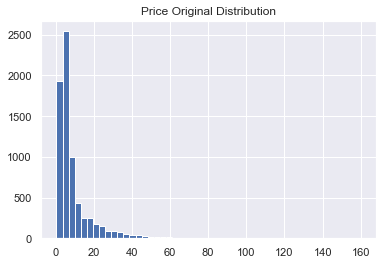

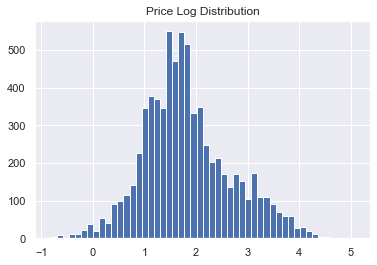

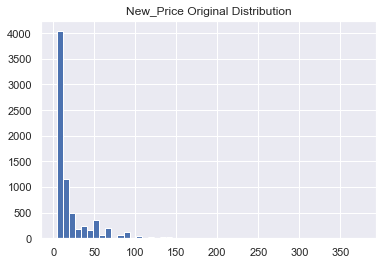

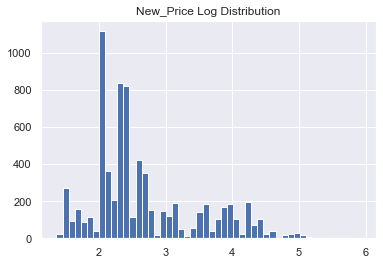

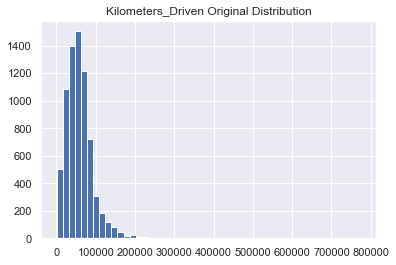

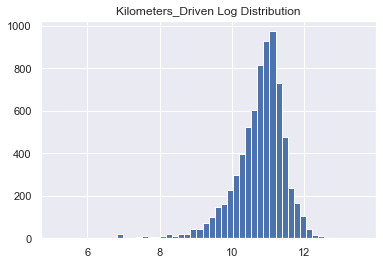

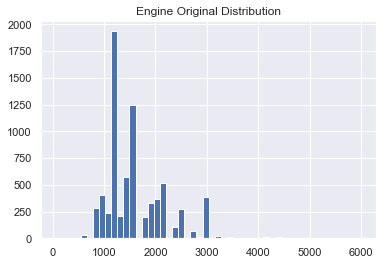

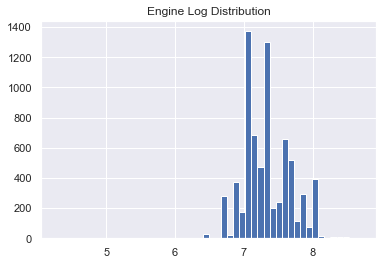

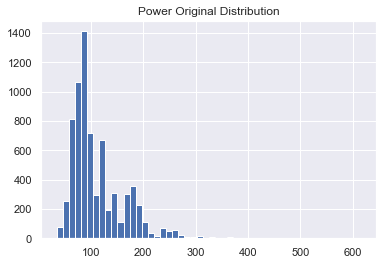

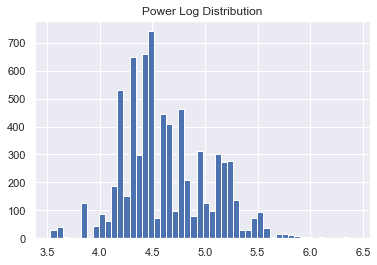

In [128]:
cols_to_log = ['Price', 'New_Price', 'Kilometers_Driven', 'Engine', 'Power']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50) #plot before a log transform
    plt.title(f'{colname} Original Distribution')
    plt.show()
    plt.hist(np.log(df[colname]), bins=50) #plot after a log transform
    plt.title(f'{colname} Log Distribution')
    plt.show()

Observations:  
After the log transform the Price column looks to be normally distributed. There are some negative values because there were some price values between 0 and 1. These shouldn't matter to our model.  
The new price column is still not normally distributed and looks to be bimodal. Honestly I'm not sure what to do about this, I haven't learnt anything about treating bimodality in my classes. Given that the transform is certainly less skewed than the original data, I'm going to transform this column.  
Kilometers_Driven has gone from extremely right skewed to slightly left skewed. It's an improvement, I'm going to keep it.  
Engine wasn't too badly skewed before the transform, however it's better afterwards and I like how the units are scaled.
Finally, the power column is still a little right skewed after the transform but it's definitely improved.  

One benefit of so many of the columns needing a transform is that the unit scaling has improved. Before we had very large values for columns like Engine and Kilometers_Driven. After the transfrom, every column is on a similar scale.


At this point I'm going to make a copy of the database before the transforms and then transform the columns.


In [129]:
df_original = df.copy() #copy the data frame to df_original before we perform the transforms

In [130]:
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname])

df.drop(cols_to_log, axis=1, inplace=True)

In [131]:
df.describe().T #Let's have a look at our data again

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.000000,2011.000000,2014.000000,2016.000000,2019.000000
Mileage,7253.0,18.312647,4.166258,6.400000,15.290000,18.160000,21.100000,36.770000
Seats,7253.0,5.278919,0.807161,2.000000,5.000000,5.000000,5.000000,10.000000
Owners,7253.0,1.201572,0.456808,1.000000,1.000000,1.000000,1.000000,4.000000
Price_log,7253.0,1.823788,0.856061,-0.820981,1.252763,1.720979,2.291524,5.075174
New_Price_log,7253.0,2.668928,0.808819,1.363537,2.064328,2.411439,3.080533,5.926926
Kilometers_Driven_log,7253.0,10.760232,0.714010,5.141664,10.434116,10.885416,11.198215,13.560618
Engine_log,7253.0,7.328169,0.337939,4.276666,7.088409,7.308543,7.584773,8.699181
Power_log,7253.0,4.628217,0.415344,3.532226,4.304065,4.529368,4.927471,6.423247


Everything looks good, except for the scale different between the year and the other columns. I'm going to reduce the scale in this column using a min-max scalar.

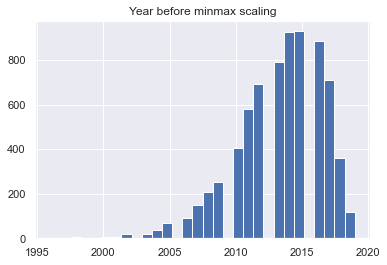

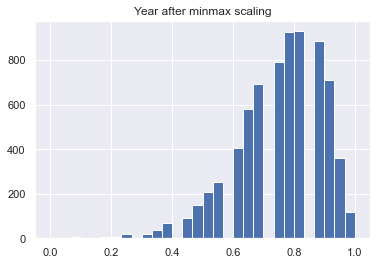

In [132]:
# replacing with scaled 
df['Year'].hist(bins=30)
plt.title('Year before minmax scaling')
plt.show()

df[['Year']] = MinMaxScaler().fit_transform(
    df[['Year']]
)

df['Year'].hist(bins=30)
plt.title('Year after minmax scaling')
plt.show()

The min max scalar hasn't affected the shape of the distribution (as expected). Only the scale has been affected. This puts the scale of the year column more in line with our other transformed columns as seen below.

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,0.755016,0.141497,0.000000,0.652174,0.782609,0.869565,1.000000
Mileage,7253.0,18.312647,4.166258,6.400000,15.290000,18.160000,21.100000,36.770000
Seats,7253.0,5.278919,0.807161,2.000000,5.000000,5.000000,5.000000,10.000000
Owners,7253.0,1.201572,0.456808,1.000000,1.000000,1.000000,1.000000,4.000000
Price_log,7253.0,1.823788,0.856061,-0.820981,1.252763,1.720979,2.291524,5.075174
New_Price_log,7253.0,2.668928,0.808819,1.363537,2.064328,2.411439,3.080533,5.926926
Kilometers_Driven_log,7253.0,10.760232,0.714010,5.141664,10.434116,10.885416,11.198215,13.560618
Engine_log,7253.0,7.328169,0.337939,4.276666,7.088409,7.308543,7.584773,8.699181
Power_log,7253.0,4.628217,0.415344,3.532226,4.304065,4.529368,4.927471,6.423247


# Encoding Categorical Variables

I'm going to make another copy of the data frame here and then encode my categorical variables. Here's what will happen:  
1) Name - drop, too many unique values.  
2) Location - encode.   
3) Fuel type - encode.    
4) Transmission - encode.  
5) Owner Type - drop, I've already created the owners column which contains this info.  
6) Brand - encode. I'm going to encode this for a first pass. I might try a model where this is dropped rather than country.    
7) Country - drop, we will encode Brand instead.  
8) Model - drop, too many unique values.

In [134]:
df_transformed = df.copy() #copy the data frame after transforming but before dropping things and encoding things

In [135]:
#Drop columns we no longer need
cols_to_drop = ['Name', 'Owner_Type', 'Country', 'Model']
for colname in cols_to_drop:
    df.drop(colname, axis=1, inplace=True)

df.head()

,Location,Year,Fuel_Type,Transmission,Mileage,Seats,Brand,Owners,Price_log,New_Price_log,Kilometers_Driven_log,Engine_log,Power_log
0,Mumbai,0.608696,CNG,Manual,26.60,5.0,Maruti,1.0,0.559616,1.706565,11.184421,6.905753,4.063198
1,Pune,0.826087,Diesel,Manual,19.67,5.0,Hyundai,1.0,2.525729,2.776332,10.621327,7.366445,4.837868
2,Chennai,0.652174,Petrol,Manual,18.20,5.0,Honda,1.0,1.504077,2.152924,10.736397,7.089243,4.485260
3,Chennai,0.695652,Diesel,Manual,20.77,7.0,Maruti,1.0,1.791759,2.422144,11.373663,7.129298,4.485936
4,Coimbatore,0.739130,Diesel,Automatic,15.20,5.0,Audi,2.0,2.875822,3.972930,10.613246,7.584773,4.947340


In [136]:
#Change variable type from object to category
#I'm not 100% sure I actually need to do this in order to do the get dummies command, I'm still learning.
cat_vars = ['Location', 'Fuel_Type', 'Transmission',
            'Brand',]

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7253 non-null   category
 1   Year                   7253 non-null   float64 
 2   Fuel_Type              7253 non-null   category
 3   Transmission           7253 non-null   category
 4   Mileage                7253 non-null   float64 
 5   Seats                  7253 non-null   float64 
 6   Brand                  7253 non-null   category
 7   Owners                 7253 non-null   float64 
 8   Price_log              7253 non-null   float64 
 9   New_Price_log          7253 non-null   float64 
 10  Kilometers_Driven_log  7253 non-null   float64 
 11  Engine_log             7253 non-null   float64 
 12  Power_log              7253 non-null   float64 
dtypes: category(4), float64(9)
memory usage: 540.6 KB


We now have everything prepared in order to encode our categorical variables. So let's do it.

In [137]:
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)
df.head()

,Year,Mileage,Seats,Owners,Price_log,New_Price_log,Kilometers_Driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land_Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0.608696,26.60,5.0,1.0,0.559616,1.706565,11.184421,6.905753,4.063198,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.826087,19.67,5.0,1.0,2.525729,2.776332,10.621327,7.366445,4.837868,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.652174,18.20,5.0,1.0,1.504077,2.152924,10.736397,7.089243,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.695652,20.77,7.0,1.0,1.791759,2.422144,11.373663,7.129298,4.485936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.739130,15.20,5.0,2.0,2.875822,3.972930,10.613246,7.584773,4.947340,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Encoding is done. Now it's time to move onto model building.

# Model Building
## First Pass Model (drop Country, use Brand)
Now everything is on the same scale and distributions of columns are (more) normal AND we have encoded all of our categorical variables, we can move on to actually fitting a model. For my first attempt I will just throw everything at the model. I can refine things from there.

In [138]:
#Defining X and y variables
X = df.drop(['Price_log'], axis=1)
y = df[['Price_log']]

print(X.shape)
print(y.shape)

(7253, 53)
(7253, 1)


In [139]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [140]:
#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                       Coefficients
Year                   2.381320e+00
Mileage               -5.449151e-03
Seats                  3.950005e-02
Owners                -6.623615e-02
New_Price_log          3.000762e-01
Kilometers_Driven_log -6.331709e-02
Engine_log             2.164250e-01
Power_log              6.028756e-01
Location_Bangalore     1.225480e-01
Location_Chennai       1.264260e-02
Location_Coimbatore    6.356532e-02
Location_Delhi        -7.365790e-02
Location_Hyderabad     1.031032e-01
Location_Jaipur       -4.098277e-02
Location_Kochi        -4.266679e-02
Location_Kolkata      -2.026999e-01
Location_Mumbai       -6.395366e-02
Location_Pune         -5.606629e-02
Fuel_Type_Diesel       9.210626e-02
Fuel_Type_Electric     7.216450e-16
Fuel_Type_LPG         -6.887704e-02
Fuel_Type_Petrol      -6.130520e-02
Transmission_Manual   -6.094265e-02
Brand_BMW             -4.464685e-02
Brand_Bentley          2.211633e-01
Brand_Chevrolet       -6.649118e-01
Brand_Datsun          -5.125

That is a lot of coefficents to try and explain! Before we try and do that, let's first look at the fit of this model and then test a simpler model.

In [142]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [143]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

Training Performance

       RMSE       MAE      R^2  Adjusted R^2
0  0.239168  0.174854  0.92076      0.919924


In [144]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.256719  0.177762  0.913063      0.910891


In [145]:
0.92076-0.913041 #Train-Test R2 values, goal is < 0.03, this model is well below this.

0.007719000000000031

# Model Building
## Second Pass Model (drop Brand, Use Country)

In our first model, we dropped the Country column and used the Brand column. This lead to a model built on 53 different parameters. In this model, we will drop the brand and encode country instead. This will create a model from 29 different paramters.

In [146]:
df = df_transformed.copy() #take a copy from the data frame before the encoding but after the transformation

In [147]:
#Drop columns we no longer need
cols_to_drop = ['Name', 'Owner_Type', 'Brand', 'Model'] #In this model we will drop brand
for colname in cols_to_drop:
    df.drop(colname, axis=1, inplace=True)

df.head()

,Location,Year,Fuel_Type,Transmission,Mileage,Seats,Country,Owners,Price_log,New_Price_log,Kilometers_Driven_log,Engine_log,Power_log
0,Mumbai,0.608696,CNG,Manual,26.60,5.0,Japanese,1.0,0.559616,1.706565,11.184421,6.905753,4.063198
1,Pune,0.826087,Diesel,Manual,19.67,5.0,Korean,1.0,2.525729,2.776332,10.621327,7.366445,4.837868
2,Chennai,0.652174,Petrol,Manual,18.20,5.0,Japanese,1.0,1.504077,2.152924,10.736397,7.089243,4.485260
3,Chennai,0.695652,Diesel,Manual,20.77,7.0,Japanese,1.0,1.791759,2.422144,11.373663,7.129298,4.485936
4,Coimbatore,0.739130,Diesel,Automatic,15.20,5.0,German,2.0,2.875822,3.972930,10.613246,7.584773,4.947340


In [148]:
#Change variable type from object to category
#I'm not 100% sure I actually need to do this in order to do the get dummies command, I'm still learning.
cat_vars = ['Location', 'Fuel_Type', 'Transmission',
            'Country',]

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7253 non-null   category
 1   Year                   7253 non-null   float64 
 2   Fuel_Type              7253 non-null   category
 3   Transmission           7253 non-null   category
 4   Mileage                7253 non-null   float64 
 5   Seats                  7253 non-null   float64 
 6   Country                7253 non-null   category
 7   Owners                 7253 non-null   float64 
 8   Price_log              7253 non-null   float64 
 9   New_Price_log          7253 non-null   float64 
 10  Kilometers_Driven_log  7253 non-null   float64 
 11  Engine_log             7253 non-null   float64 
 12  Power_log              7253 non-null   float64 
dtypes: category(4), float64(9)
memory usage: 539.5 KB


We now have everything prepared in order to encode our categorical variables. So let's do it.

In [149]:
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)
df.head()

,Year,Mileage,Seats,Owners,Price_log,New_Price_log,Kilometers_Driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Country_British,Country_European,Country_German,Country_Indian,Country_Japanese,Country_Korean
0,0.608696,26.60,5.0,1.0,0.559616,1.706565,11.184421,6.905753,4.063198,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0.826087,19.67,5.0,1.0,2.525729,2.776332,10.621327,7.366445,4.837868,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
2,0.652174,18.20,5.0,1.0,1.504077,2.152924,10.736397,7.089243,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,0.695652,20.77,7.0,1.0,1.791759,2.422144,11.373663,7.129298,4.485936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0.739130,15.20,5.0,2.0,2.875822,3.972930,10.613246,7.584773,4.947340,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


Encoding is done. Now it's time to move onto model building.

In [150]:
#Defining X and y variables
X = df.drop(['Price_log'], axis=1)
y = df[['Price_log']]

print(X.shape)
print(y.shape)

(7253, 29)
(7253, 1)


In [151]:
#split the data into train and test using: from sklearn.model_selection import train_test_split imported at the top of notebook
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [152]:
X_train.head() #We can see the index is now random so the train_test_split has worked

,Year,Mileage,Seats,Owners,New_Price_log,Kilometers_Driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Country_British,Country_European,Country_German,Country_Indian,Country_Japanese,Country_Korean
62,0.826087,11.74,5.0,1.0,3.901771,10.968198,7.493317,5.225747,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3017,0.956522,13.60,4.0,1.0,3.740523,7.996654,7.376508,5.198497,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3504,0.739130,24.70,5.0,1.0,1.472472,10.086933,6.679599,3.856510,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
2156,0.782609,12.99,7.0,1.0,3.178470,11.562135,7.821643,4.611152,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
6843,0.782609,17.68,5.0,1.0,4.206184,11.492723,7.584773,5.160950,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [153]:
#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                       Coefficients
Year                   2.325521e+00
Mileage               -3.879255e-03
Seats                  4.896269e-02
Owners                -5.856236e-02
New_Price_log          3.575157e-01
Kilometers_Driven_log -8.750751e-02
Engine_log             2.153523e-01
Power_log              5.855977e-01
Location_Bangalore     1.322398e-01
Location_Chennai       1.982732e-02
Location_Coimbatore    7.839110e-02
Location_Delhi        -5.669570e-02
Location_Hyderabad     1.146612e-01
Location_Jaipur       -3.158711e-02
Location_Kochi        -3.084268e-02
Location_Kolkata      -2.150396e-01
Location_Mumbai       -7.069881e-02
Location_Pune         -5.888441e-02
Fuel_Type_Diesel       4.061550e-02
Fuel_Type_Electric     8.326673e-17
Fuel_Type_LPG         -8.834380e-02
Fuel_Type_Petrol      -1.370272e-01
Transmission_Manual   -9.572739e-02
Country_British        4.748697e-01
Country_European       3.760959e-02
Country_German         2.535042e-01
Country_Indian        -8.332

In [155]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

Training Performance

       RMSE      MAE       R^2  Adjusted R^2
0  0.259586  0.19168  0.906654      0.906117


In [156]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.269397  0.193133  0.904264       0.90297


In [157]:
0.906654-0.904231 #Train-Test R2 values goal is < 0.03, this model is well below this.

0.002422999999999953

### Model test comments

Our first pass model had 53 variables. The fit was very good with R2 scores in the train and test set 0.921 and 0.913 respectively.  
Our second pass model had 29 variables. The fit was again very good with R2 scores in the train and test set 0.0907 and 0.904 respectively.  
In our second model we dropped 24 variables and our R2 score in our test set dropped 0.913-0.904 = 0.009  
That is a big drop in the number of variables for a tiny drop in R2. For this reason, I prefer the second pass model.

Our values for RMSE, MAE, R2 and Adjusted R2 change very little between our train and test sets. So it appears that the model is a good fit and isn't overfitting

# Test Assumptions of Linear Regression Model

In [158]:
# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()   #Copy our X data frame
X1['const'] = 1  #Add a constant column
X1.head()

,Year,Mileage,Seats,Owners,New_Price_log,Kilometers_Driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Country_British,Country_European,Country_German,Country_Indian,Country_Japanese,Country_Korean,const
0,0.608696,26.60,5.0,1.0,1.706565,11.184421,6.905753,4.063198,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0.826087,19.67,5.0,1.0,2.776332,10.621327,7.366445,4.837868,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1
2,0.652174,18.20,5.0,1.0,2.152924,10.736397,7.089243,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
3,0.695652,20.77,7.0,1.0,2.422144,11.373663,7.129298,4.485936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0.739130,15.20,5.0,2.0,3.972930,10.613246,7.584773,4.947340,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [159]:
# Here we will be using our library: from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Year                        2.149060
Mileage                     3.892256
Seats                       2.078379
Owners                      1.253455
New_Price_log               6.240281
Kilometers_Driven_log       1.733021
Engine_log                 10.691214
Power_log                   8.646780
Location_Bangalore          2.475576
Location_Chennai            2.939922
Location_Coimbatore         3.494917
Location_Delhi              3.106865
Location_Hyderabad          3.713441
Location_Jaipur             2.655169
Location_Kochi              3.490415
Location_Kolkata            3.122341
Location_Mumbai             3.951333
Location_Pune               3.428090
Fuel_Type_Diesel           31.136648
Fuel_Type_Electric          1.088819
Fuel_Type_LPG               1.214985
Fuel_Type_Petrol           31.885446
Transmission_Manual         2.103451
Country_British             1.602569
Country_European            1.738423
Country_German              4.105181
Cou

We are aiming for VIF scores less that 5. Scores greater than 5 are an indication that there is multicollinearity between some of our predictor variables. We see high values in Power, Engine and New Price. We have seen from our correlation matrix (heatmap) that these variables are highly correlated.  
The other variables with high VIF scores are Fuel_Type_Diesel and Fuel_Type_Petrol. These are the two dominant fuel types - by a long way. So if a car isn't Diesel, it's very, very likely that it's Petrol. So the two variables are negatively correlated.  In the next section we will try removing some of these variables and see what happens to our VIF scores and our model fit statistics (RMSE, R2, etc.)

## Removing Multicollinearity
To remove multicollinearity we will perform the following
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the variables that reduce the Adjusted-R square
  4. Check the VIF Scores again
  5. Continue untill we get all VIF scores under 5

In [160]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [161]:
high_vif_columns = ["Engine_log","Power_log","New_Price_log","Fuel_Type_Diesel", "Fuel_Type_Petrol"]

X_train1 = X_train.copy()
X_train1['constant'] = 1  #Make a copy of the original train set, then add a constant (needed for VIF score)

X_test1 = X_test.copy()
X_test1['constant'] = 1  #Also copy the test set, and add a constant

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                col  Adj_rsq_after_dropping_col  Test RMSE
3  Fuel_Type_Diesel                    0.906099   0.269304
4  Fuel_Type_Petrol                    0.905915   0.270323
0        Engine_log                    0.905469   0.268064
1         Power_log                    0.896714   0.288272
2     New_Price_log                    0.887528   0.296455


Adjusted R2 goes down when we drop the Power_log and New_Price_log columns, so we will keep those. We can drop the Engine_log and we can also drop one of the fuel types, let's choose Diesel, and see what happens.

In [162]:
X_train2 = X_train1.drop(['Engine_log','Fuel_Type_Diesel'], axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('VIF Scores after one round of dropping variables: \n\n{}\n'.format(vif_series2))

VIF Scores after one round of dropping variables: 

Year                        2.150543
Mileage                     3.191116
Seats                       1.980917
Owners                      1.270716
New_Price_log               5.992161
Kilometers_Driven_log       1.711086
Power_log                   4.601242
Location_Bangalore          2.491535
Location_Chennai            3.040123
Location_Coimbatore         3.542176
Location_Delhi              3.271208
Location_Hyderabad          3.833570
Location_Jaipur             2.767752
Location_Kochi              3.496417
Location_Kolkata            3.100425
Location_Mumbai             4.112898
Location_Pune               3.528839
Fuel_Type_Electric               NaN
Fuel_Type_LPG               1.015367
Fuel_Type_Petrol            2.321460
Transmission_Manual         2.059606
Country_British             1.622270
Country_European            1.804360
Country_German              4.045381
Country_Indian              2.096547
Country_Japanese       

That has brought down the VIF scores quite a bit. The only ones that are still of concern are the New_Price_log and Power_log, which we know are highly correlated. Let's perform the same test again, dropping each variable in turn and checking the adjusted R2 and RMSE scores

In [163]:
high_vif_columns = ["New_Price_log","Power_log"]
X_test2 = X_test1.drop(['Engine_log','Fuel_Type_Diesel'], axis=1) #Here I need to drop the same columns from the test set so X_train2 and X_test2 have the same shape

treating_multicollinearity(high_vif_columns, X_train2, X_test2, y_train, y_test)

             col  Adj_rsq_after_dropping_col  Test RMSE
0  New_Price_log                    0.885107   0.293726
1      Power_log                    0.881052   0.300099


There doesn't seem to be too much difference to the predictive power of the model if we drop New_Price_log or Power_log. It seems that dropping Power_log would lead to a slightly higher RMSE so we will keep that log. Given the shear amount of filled data in the New_Price_log, it's probably best to drop that log anyway.

In [164]:
# We'll drop New_Price_Log and check the vif again

X_train3 = X_train2.drop('New_Price_log', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('VIF Scores after two rounds of dropping variables: \n\n{}\n'.format(vif_series2))

VIF Scores after two rounds of dropping variables: 

Year                        2.139103
Mileage                     3.080892
Seats                       1.974130
Owners                      1.270465
Kilometers_Driven_log       1.710467
Power_log                   3.081483
Location_Bangalore          2.491283
Location_Chennai            3.040010
Location_Coimbatore         3.539674
Location_Delhi              3.270960
Location_Hyderabad          3.833438
Location_Jaipur             2.767712
Location_Kochi              3.494612
Location_Kolkata            3.100406
Location_Mumbai             4.112896
Location_Pune               3.528686
Fuel_Type_Electric               NaN
Fuel_Type_LPG               1.013824
Fuel_Type_Petrol            2.147805
Transmission_Manual         2.010265
Country_British             1.448855
Country_European            1.794323
Country_German              3.712982
Country_Indian              2.071551
Country_Japanese            4.200051
Country_Korean        

We now have all VIF scores under 5. So at this point we will stop dropping variables, fit a new model trained on just the above variables and check its fit statistics.

In [165]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train3,y_train)

print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train3, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.287224  0.214867  0.885718      0.885107


After testing for multicollinearity and removing collinear variables, we now have a new model that returns a R2 score of 0.886 on the train set and 0.886 on the test set. The next step is to test for the other assumptions of linear regression.  

## Mean of residuals

We expect the mean of the residuals to be close to zero

In [166]:
# predicted values
fitted = lin_reg_model1.predict(X_train3)  #This gives us our predicted values
residual = fitted - y_train.values  #This gives us our residuals

np.mean(residual)

-4.6014884722025595e-14

-0.000000000000046 is very close to zero. So I think we are fine there.


## Test for Linearity 

Make a plot of fitted values vs residuals, if they don’t follow any pattern, then we say the model is linear. Otherwise model is showing signs of non-linearity.


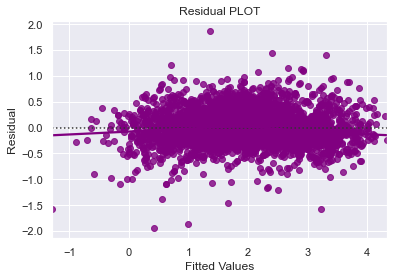

In [167]:
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If a pattern exists in this plot, we consider it as signs of non-linearity in the data. A pattern means that the model doesn’t capture non-linear effects.
No pattern in residual plot, hence assumption is satisfied.

## Test for Homoscedasticity

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

As we can see in the plot above, there is no pattern in the residual, so the the assumption of homoscedasticity is satisfied 

## Test for Normality

* The assumption is that Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

The plot below shows the distribution of the residuals. We have seen before that the mean is zero. We can see below that the distribution of residuals is normal.

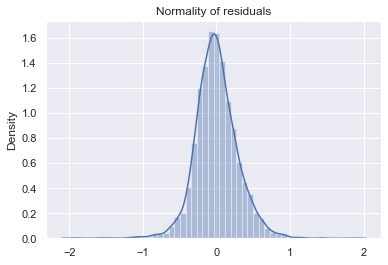

In [168]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

The normality of residuals can also be checked on a QQ plot. Residuals with a normal distribution will make an appoximately straight line on the plot.

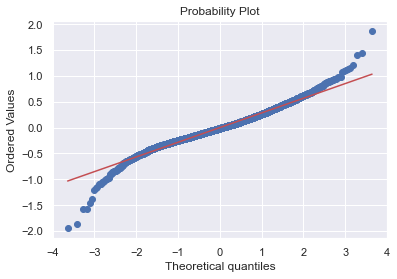

In [169]:
import pylab #note that these libraries were not imported at the top of the notebook as they are only used in this plot.
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

The line in the QQ plot above is approximately straight, meaning the residuals are normally distributed. So the assumption is satisfied.

# Predicting on the test data

We have checked all of our assumptions are satisfied, so let's predict on the test data

In [170]:
X_train3.columns #here is the list of the final columns used.

Index(['Year', 'Mileage', 'Seats', 'Owners', 'Kilometers_Driven_log',
       'Power_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Country_British', 'Country_European', 'Country_German',
       'Country_Indian', 'Country_Japanese', 'Country_Korean', 'constant'],
      dtype='object')

In [171]:
# Selecting columns from test data that we used to create our final model
X_test['constant'] = 1 # first we add the constant to test input variables
X_test_final = X_test[X_train3.columns]

In [172]:
X_test_final.head() #Check to see that the test data has the same columns as the train data

,Year,Mileage,Seats,Owners,Kilometers_Driven_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Country_British,Country_European,Country_German,Country_Indian,Country_Japanese,Country_Korean,constant
2397,0.869565,17.0,5.0,1.0,9.973946,4.798761,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
3777,0.826087,21.5,5.0,1.0,10.816132,4.404277,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1
4425,0.478261,13.1,7.0,1.0,11.775290,4.948760,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3661,0.869565,13.0,5.0,1.0,10.590441,5.303802,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4514,0.869565,16.9,5.0,1.0,10.726785,4.406719,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [173]:
y_pred = lin_reg_model1.predict(X_test_final)

Let's check the performance on the final train and test set

In [174]:
print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train3, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.287224  0.214867  0.885718      0.885107


In [175]:
print('Test Performance\n')
print(model_perf(lin_reg_model1, X_test_final, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.293726  0.215337  0.886191      0.884761


Both the train and test data have low RMSE and high R2 scores. So the model is a good fit. There is very little difference between the R2 and RMSE scores between the train and test data, this indicates that the model is not overfitting. The final difference between the R2 scores is 0.0004, our goal is < 0.03 so that is satisfied.

In [176]:
0.885718-0.886159 #difference between R2 scores in train and test data.

-0.0004410000000000247

In [177]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(lin_reg_model1.coef_.flatten(), \
                       index=X_train3.columns.tolist(), columns=['Coefficients'])
print(coef_df)

#I will comment on the Coefficients in the Actionable Insights and Recommendations section

                       Coefficients
Year                   2.220011e+00
Mileage               -1.810130e-02
Seats                  7.013887e-02
Owners                -6.322731e-02
Kilometers_Driven_log -9.127865e-02
Power_log              1.053647e+00
Location_Bangalore     1.411253e-01
Location_Chennai       1.928612e-02
Location_Coimbatore    9.971626e-02
Location_Delhi        -4.932153e-02
Location_Hyderabad     1.227665e-01
Location_Jaipur       -2.789399e-02
Location_Kochi        -1.039951e-02
Location_Kolkata      -2.131707e-01
Location_Mumbai       -6.887878e-02
Location_Pune         -5.250334e-02
Fuel_Type_Electric    -3.885781e-16
Fuel_Type_LPG         -2.806665e-01
Fuel_Type_Petrol      -3.147412e-01
Transmission_Manual   -1.497523e-01
Country_British        8.054807e-01
Country_European       8.504847e-02
Country_German         4.173255e-01
Country_Indian        -1.490443e-01
Country_Japanese       1.924027e-01
Country_Korean         1.461763e-01
constant              -3.648

# Actionable Insights and Recommendations

We now have a model that predicts the marked price for used cars based on:  
Year of Manufacture, Mileage, # of Seats, # Owner Type, Kilometers Driven, Power, Location, Fuel Type, Trasmission and Counrty of Make. Cars4U can use the model to determine the market price of a used car to  
a) make sure that they do not sell cars below the market price and
b) deturmine if a car is below market price, so they can buy the car and then re-sell at market price.  

It appears that the cars that hold their value the best are British cars. We saw this in our bi-variate plots and we can see in the coefficients above that, of all the countries, British has the highest value coefficient. Cars4U could use this knowledge and seek out British cars that are below market value to buy and re-sell. It appears that the car being manufactured in India has a negative effect on the used price (evinced by the negative coefficient). Cars4U should be careful when dealing in cars manufactured in India.

If we look at the location coefficients, we can see that just over half of them are negative. If a location coefficient is negative, it means that this location has lower prices. Cars4U could potentially buy cars in the locations where the used price is lower, like  Jaipur, Kochi, Kolkata, etc. and sell them in locations where the used price is higher, like Bangalore, Chennai, Coimbatore or Hyderabad.

The coefficients with the highest values are power and year. We saw from our bi-variate analysis that year definitely has an effect on price. The higher the year, the newer the car and the higher the price. However there was another factor that was very highly correlated with price: the New_Price. The used price of a car is highly dependent on the year it was build and also the cost of the car when it was new. This makes just makes sense, so it is good to see our model reflecting reality.  
During our work we dropped the New_Price column from our model. This is because it was so highly correlated with the power column. Given that there were so many New_Price values missing, I feel that this was the correct choice. If the provided data base is any indication, Cars4U will not always have the new price of a car. However they can find the power of the car and this is just as strong a predictor of the new and used price of the car.

## Actual vs. Predicted

Now let's look at where our model could go wrong by comparing the actual values in the test data to the values predicted by our model.

In [178]:
actual = y_test.reset_index() #Copy the y_test data to a data frame, strip the index as it is currently random.
actual.drop(['index'], axis=1, inplace=True)
actual.rename(columns={'Price_log':'Actual'}, inplace=True)

predicted = pd.DataFrame(y_pred) #y_pred is our model's predictions of the y_test data.
predicted.rename(columns={0:'Predicted'}, inplace=True)

temp = pd.concat([actual,predicted], axis=1) #join the two data frames together in a 'temp' data frame.
temp.head()

,Actual,Predicted
0,1.791759,1.730224
1,1.413423,1.454899
2,1.791759,1.716697
3,3.563316,3.473198
4,1.846879,1.748942


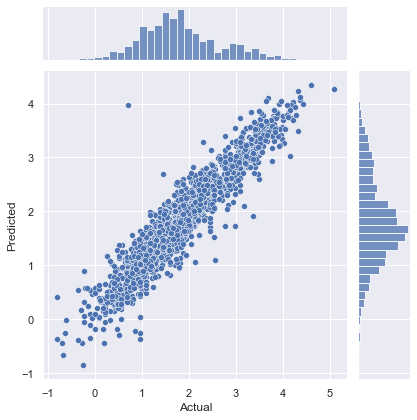

In [179]:
#Now let's plot the actual vs. predicted results. Keep in mind that the values are log(price).
sns.jointplot(data=temp, x='Actual', y='Predicted'); 

We can see that the actual and predicted points fall very close to an y=x line. A prefect prediction R2 = 1 would describe a perfect y=x line. Our prediction on the test data has an R2 score of 0.886. We can see that our model perfoms the best on the mid to higher value cars. Where the log(price) value is above 1 (true price is above 2.7 Lakh). So Cars4U might want to focus their efforts on cars above this value where our model performs the best.

We can see that the car with the highest actual price, which corresponds to a Land Rover in the data set and plots just above 5 on the log_price scale above, has a predicted price that is too low. This is most likely due to the fact that this car is such an outlier in terms of price. Take a look at the plot below. We can see that the Land Rover, with the price at 160 Lakh is an outlier for it's Model, Brand, Country. The fact that it is such an outlier is the cause for the misprediction.


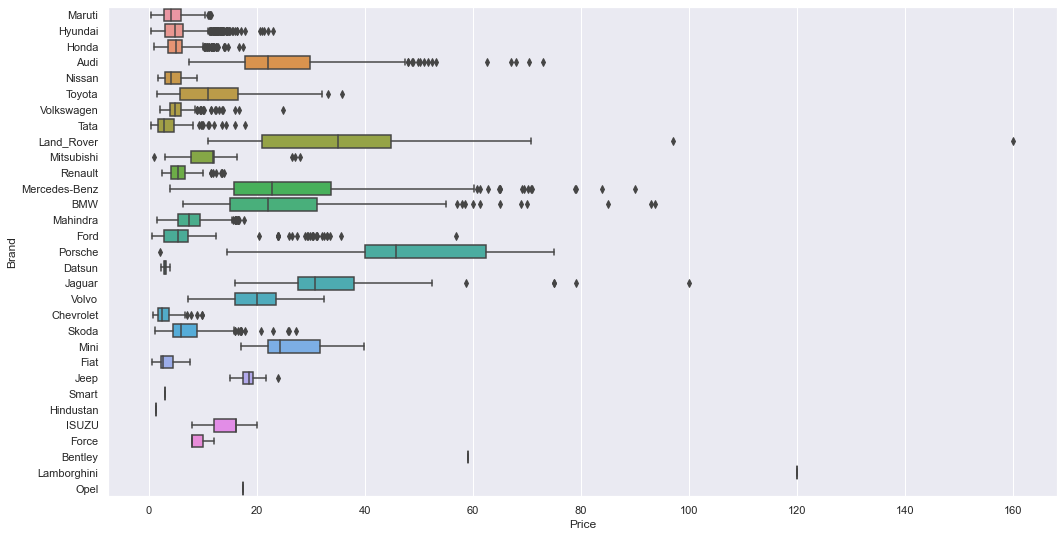

In [180]:
plt.figure(figsize=(17,9))
sns.boxplot(y="Brand",x="Price",data=df_original)
plt.show()

The other point of concern in the predicted vs. actual plot is the outier with an actual log(price) of about 0.8 and a predicted log(price) of around 4. From the histogram plots to the side of the main plot, we can see that this is just a single point and not a cluster of points. This means that of the 2176 cars in the test data, one of them gives a strange prediction. My first guess, was that it was one of the electric cars. There are only two of them in the data and it's more likely that models will miss-predict when there is a lack of good training data. However I checked the price of the electric cars an both of them have log(price) values well above the 0.8 we see here. It could be that one of the cars has an error in the Power column, given that power was a strong indicator of high price, there could be a car in the data that has a high power value but other indicators are low. In truth, I don't know why the model has predicted the price of this one car so badly, however, my hunch is that it is due to the car being unique in the data.

### Final thoughts

We have created a model that gives a good prediction (R2 of 0.886 in test data) of used car prices in India based on the provided data, and given recommendations to "Cars4U" based on our EDA, model coefficients and model performance (i.e. model performs better on cars with price above 2.7 Lakh).

At this point I've been working on this project for about 35 hours and I'm going to finish here. Like most pieces of work, it's never truly "finished". As we spend more time with data, we learn more about it and generate new ideas. For example we could continue to drop variables from the model to reduce the complexity. Binning the Brands into Country of Manufacture reduced the number of variables down from 53 to 29 variables, which is good. Looking at the data now we could probably bin the fuel types into Diesil and Other. Given that the two main fuel types are Diesil and Petrol, we could likely bin CNG, Electric and LPG with Petrol without affecting the model performance too much. The more we reduce the variables the more intuative the interpretation of the coefficients of our model becomes. There are likely other variables that we could drop/bin, for example we could try binning the cities into northern and southern and re-checking the performance of our model.

The point is that there is likely quite a bit that can still be done. I hope that I have done enough to fully satisfy whoever is marking this. There is a lot here! So thanks for reading this far.

Ben Hardy
April 20th 2021
